<a href="https://colab.research.google.com/github/ritchh12/house-price-prediction/blob/main/House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
file = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('train.csv')
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd        NaN   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng        NaN   
9          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [ ]:
pd.set_option('display.max_rows', None)
df.isnull().sum()
missing_percent = df.isnull().mean() * 100

# Show columns with more than 30% missing values
high_missing = missing_percent[missing_percent > 30]
print("Columns to drop:\n", high_missing)
df.drop(columns=high_missing.index,inplace=True)


Columns to drop:
 Alley          93.767123
MasVnrType     59.726027
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64


In [ ]:
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   
5   6          50       RL         85.0    14115   Pave      IR1         Lvl   
6   7          20       RL         75.0    10084   Pave      Reg         Lvl   
7   8          60       RL          NaN    10382   Pave      IR1         Lvl   
8   9          50       RM         51.0     6120   Pave      Reg         Lvl   
9  10         190       RL         50.0     7420   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   
5    AllPub    Inside       Gtl      Mitchel       Norm       Norm     1Fam   
6    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam   
7    AllPub    Corner       Gtl       NWAmes       PosN       Norm     1Fam   
8    AllPub    Inside       Gtl      OldTown     Artery       Norm     1Fam   
9    AllPub    Corner       Gtl      BrkSide     Artery     Artery   2fmCon   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   
5     1.5Fin            5            5       1993          1995     Gable   
6     1Story            8            5       2004          2005     Gable   
7     2Story            7            6       1973          1973     Gable   
8     1.5Fin            7            5       1931          1950     Gable   
9     1.5Unf            5            6       1939          1950     Gable   

  RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd       196.0        Gd        TA      PConc   
1  CompShg     MetalSd     MetalSd         0.0        TA        TA     CBlock   
2  CompShg     VinylSd     VinylSd       162.0        Gd        TA      PConc   
3  CompShg     Wd Sdng     Wd Shng         0.0        TA        TA     BrkTil   
4  CompShg     VinylSd     VinylSd       350.0        Gd        TA      PConc   
5  CompShg     VinylSd     VinylSd         0.0        TA        TA       Wood   
6  CompShg     VinylSd     VinylSd       186.0        Gd        TA      PConc   
7  CompShg     HdBoard     HdBoard       240.0        TA        TA     CBlock   
8  CompShg     BrkFace     Wd Shng         0.0        TA        TA     BrkTil   
9  CompShg     MetalSd     MetalSd         0.0        TA        TA     BrkTil   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       Gd       TA           No          GLQ         706          Unf   
1       Gd       TA           Gd          ALQ         978          Unf   
2       Gd       TA           Mn          GLQ         486          Unf   
3       TA       Gd           No          ALQ         216          Unf   
4       Gd       TA           Av          GLQ         655          Unf   
5       Gd       TA           No          GLQ         732          U

In [ ]:
#script for filling NaN values
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':  # Categorical
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:  # Numeric
            if df[column].skew() > 1 or df[column].skew() < -1:
                df[column].fillna(df[column].median(), inplace=True)
            else:
                df[column].fillna(df[column].mean(), inplace=True)


/tmp/ipython-input-71-1797496507.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
/tmp/ipython-input-71-1797496507.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [ ]:
df.head(1)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   

  RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd       196.0        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       Gd       TA           No          GLQ         706          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0           0        150          856    GasA        Ex          Y      SBrkr   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1          Gd             8   

  Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  \
0        Typ           0     Attchd       2003.0          RFn           2   

   GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
0         548         TA         TA          Y           0           61   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500

1.8828757597682129


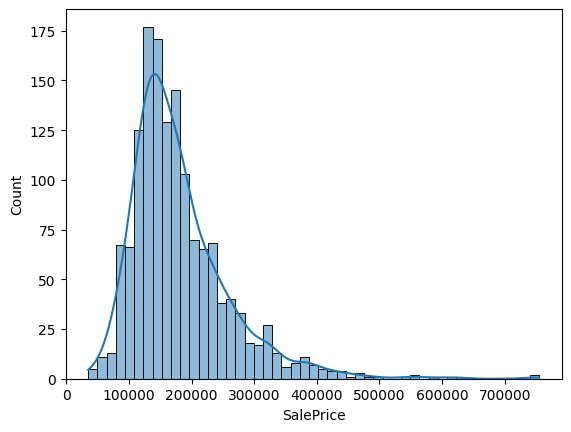

In [ ]:
#checking skewness
sns.histplot(df['SalePrice'], kde=True)


In [ ]:
# handling skewed data with log transfomation
df['SalePrice']=np.log1p(df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

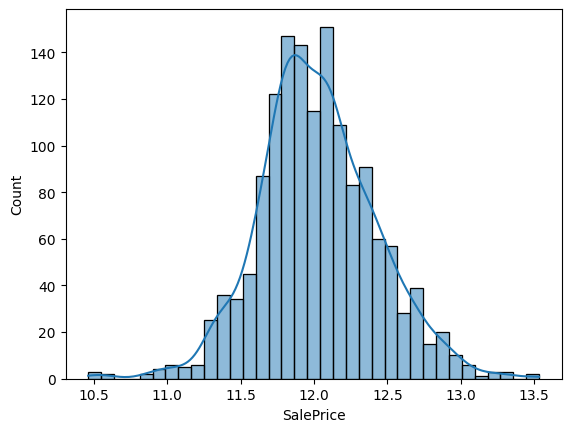

In [ ]:
sns.histplot(df['SalePrice'],kde=True)

In [ ]:
df['SalePrice'].skew()

np.float64(0.12134661989685333)

In [ ]:
#encoding data
df=pd.get_dummies(df,drop_first=True)

<Axes: >

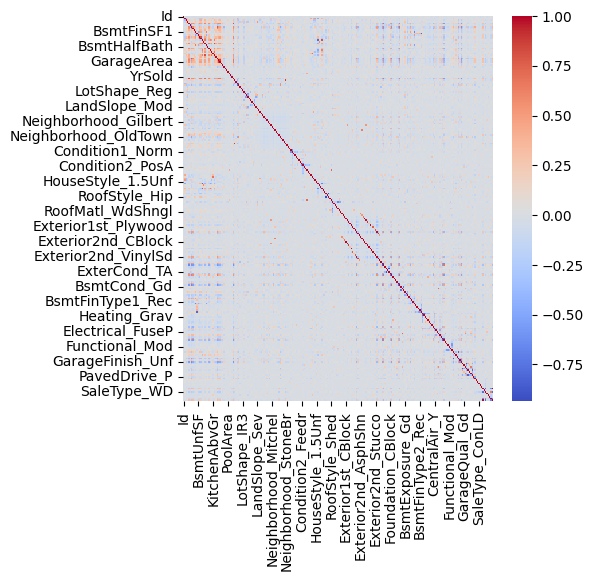

In [ ]:
plt.figure(figsize=(5,5))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)


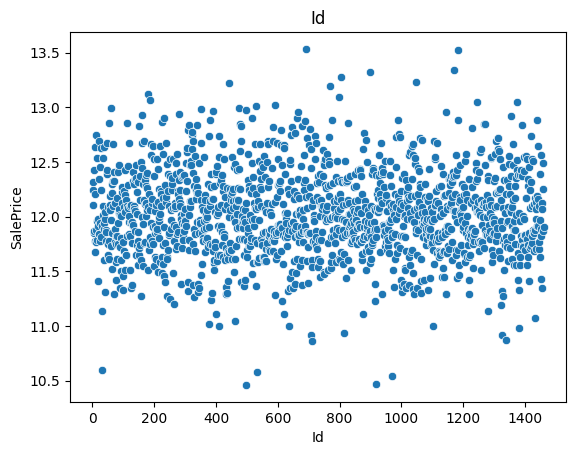

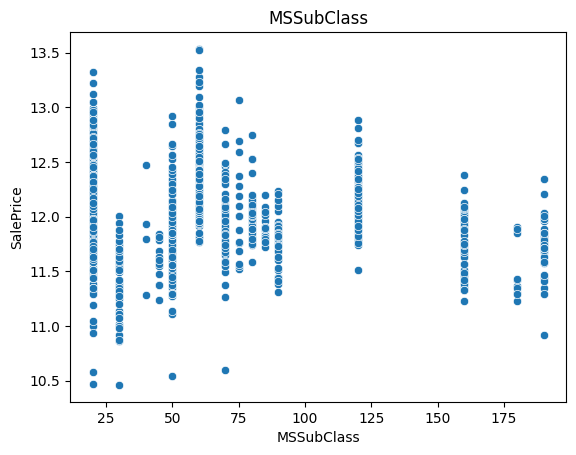

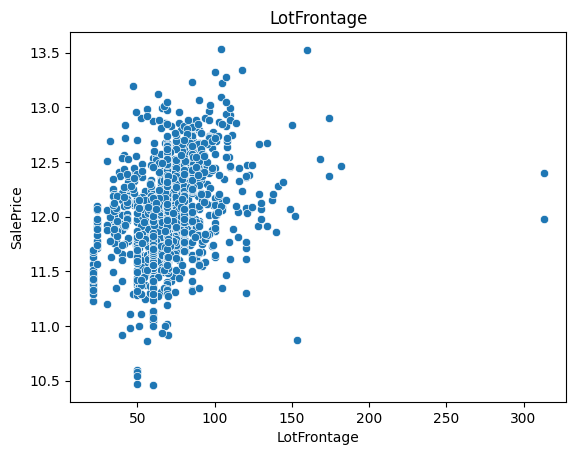

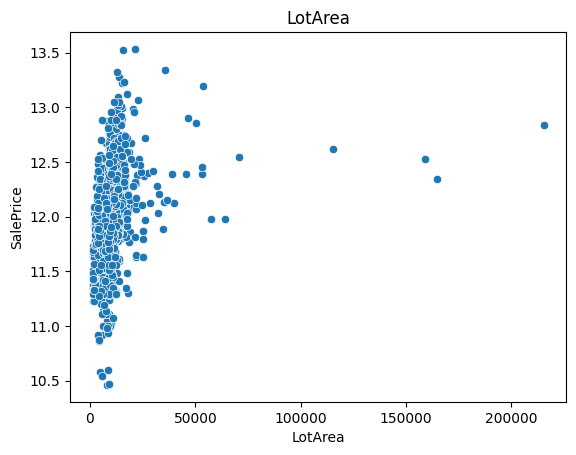

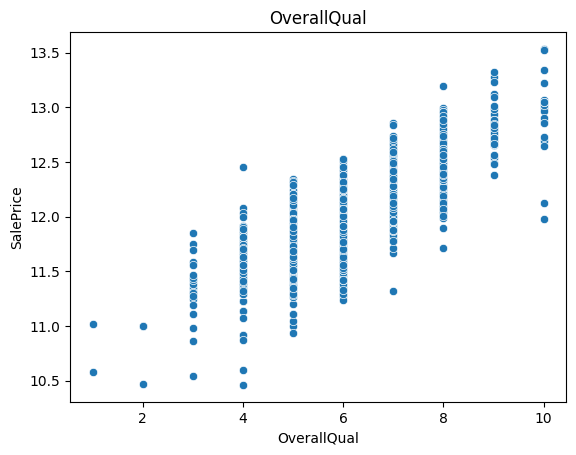

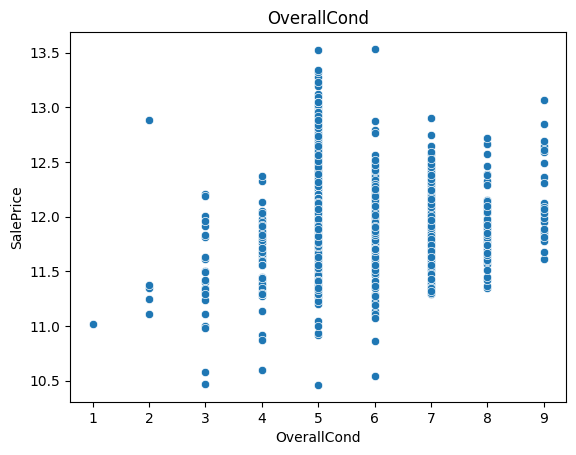

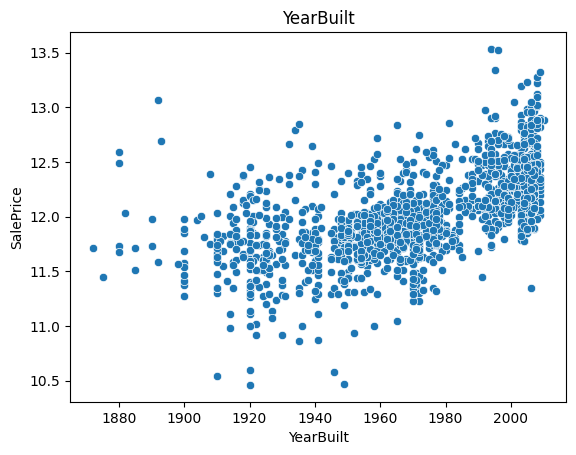

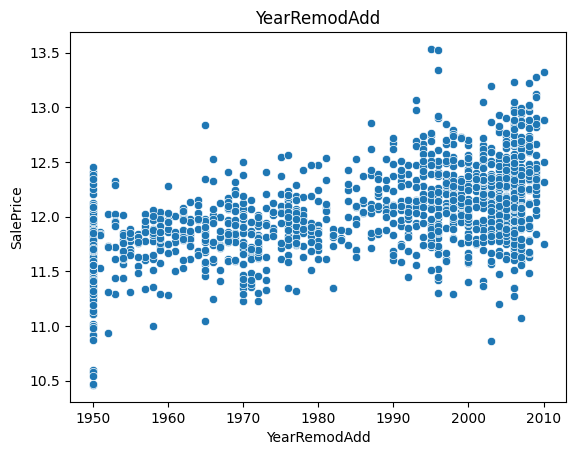

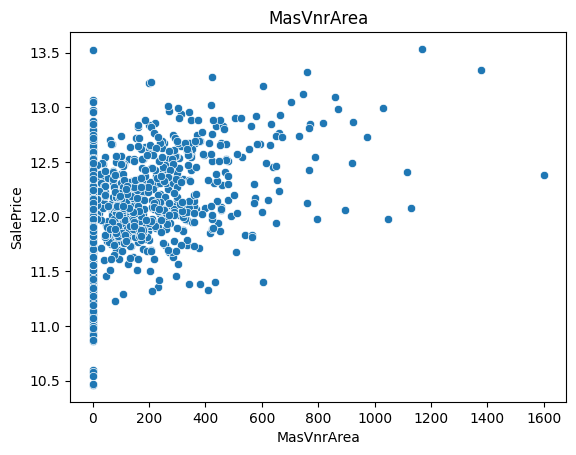

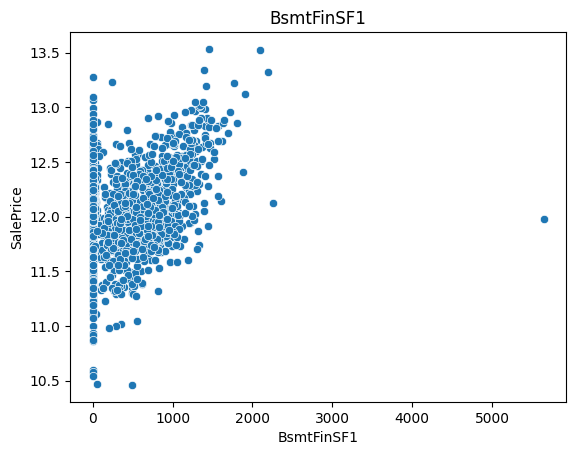

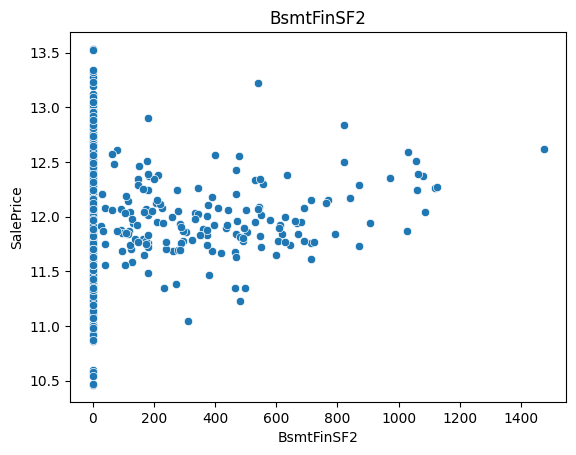

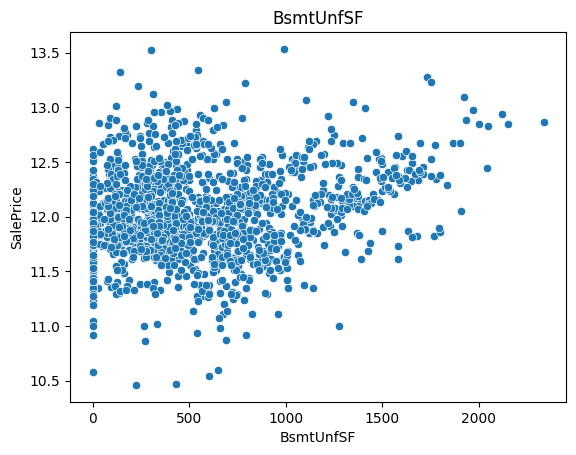

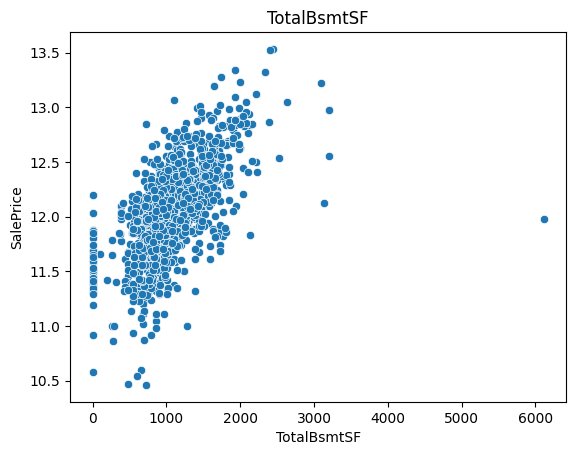

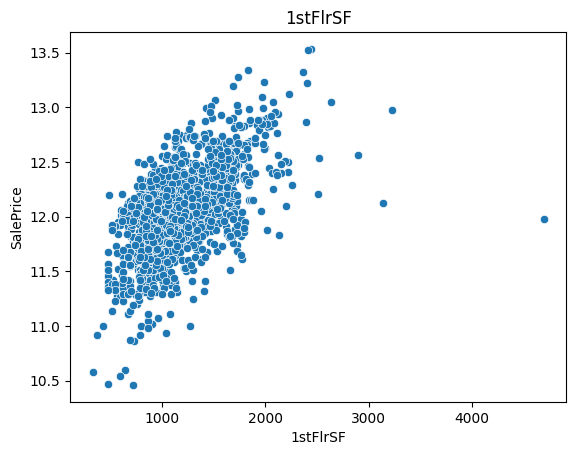

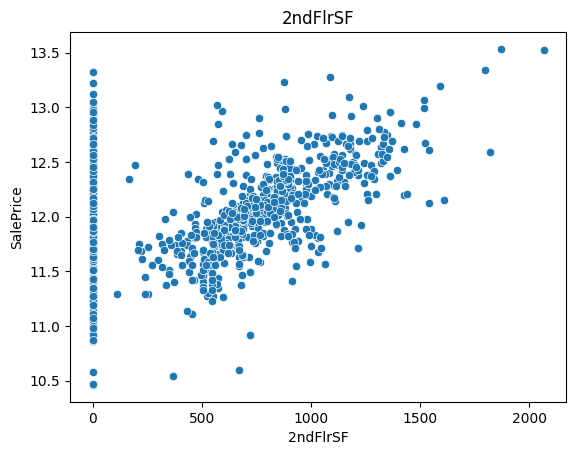

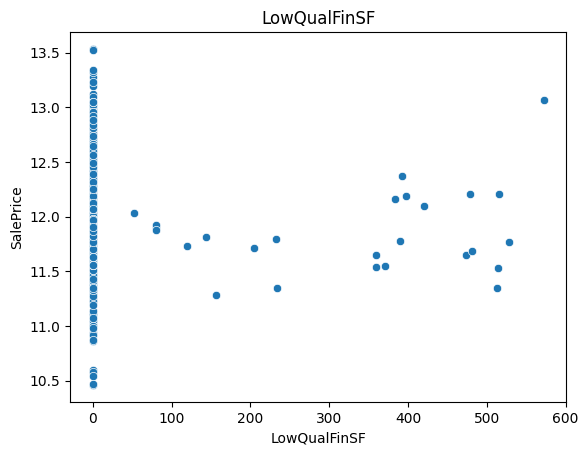

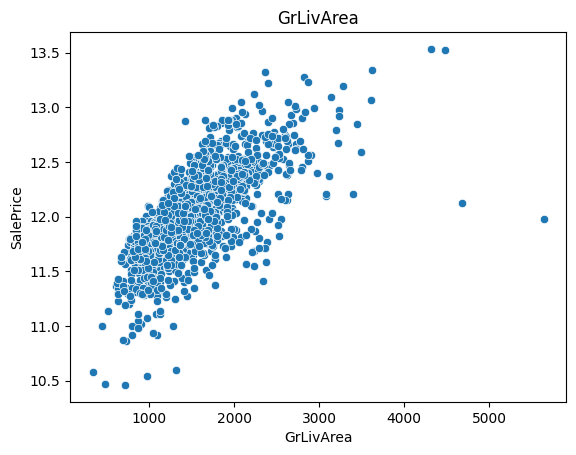

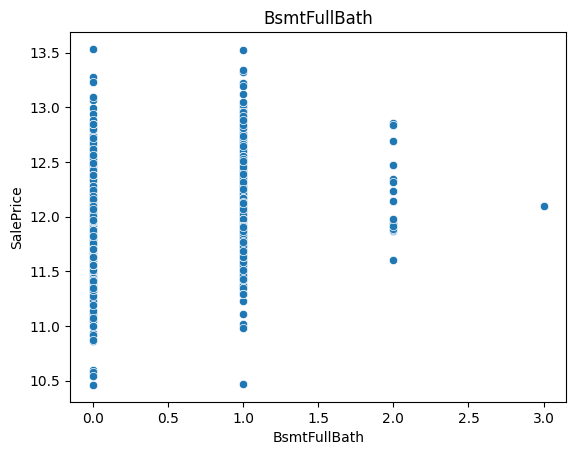

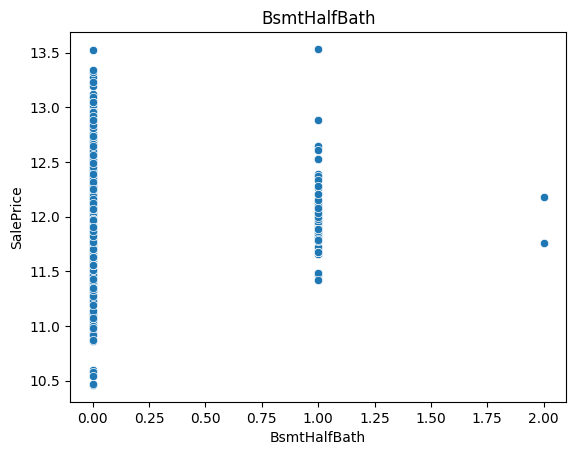

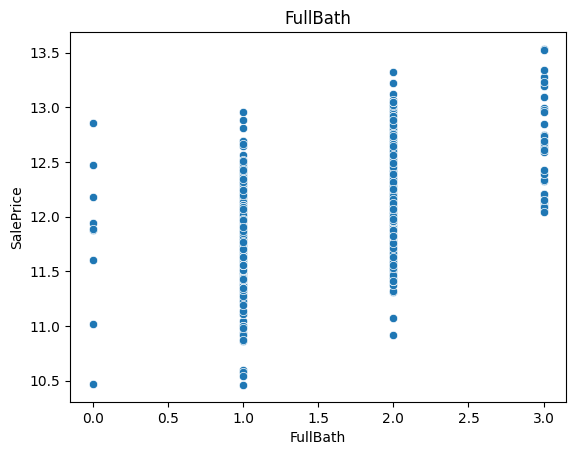

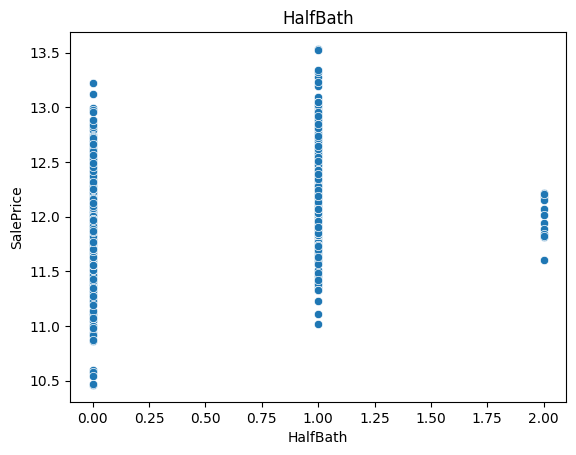

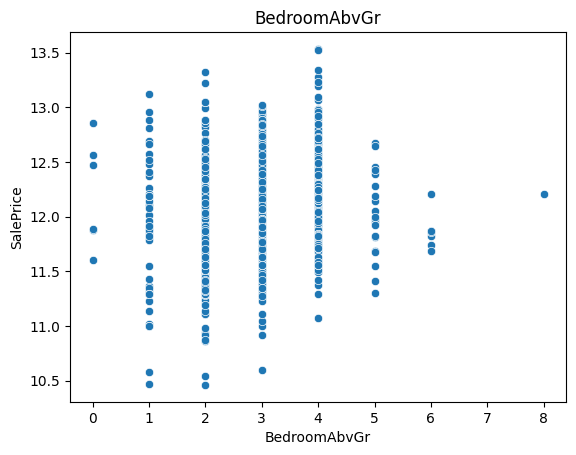

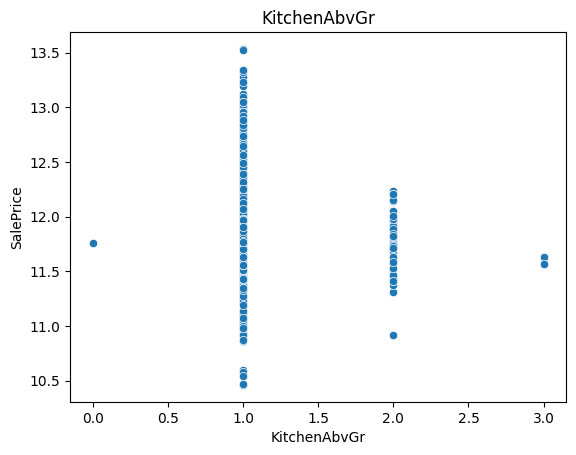

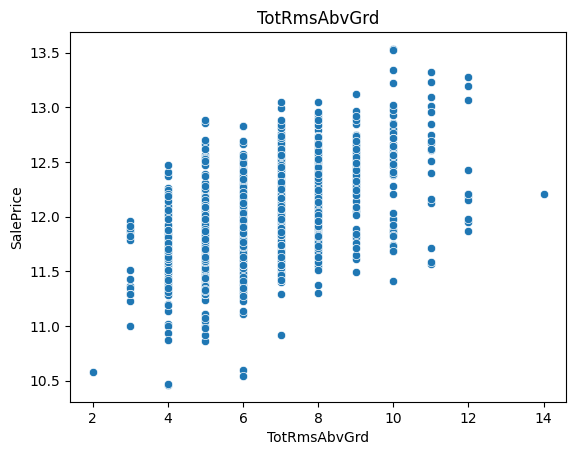

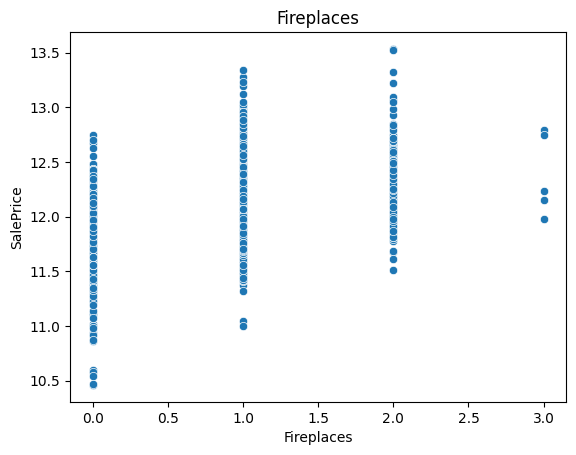

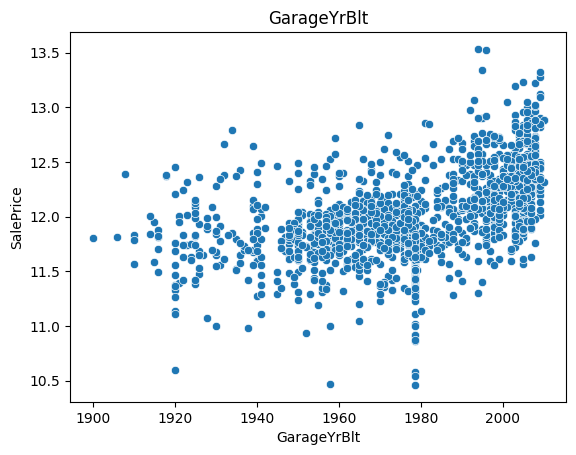

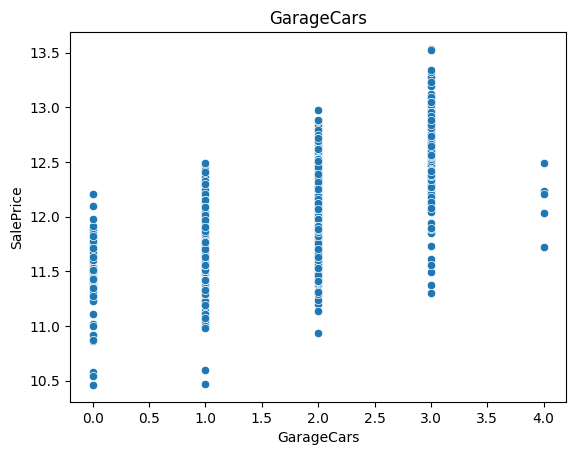

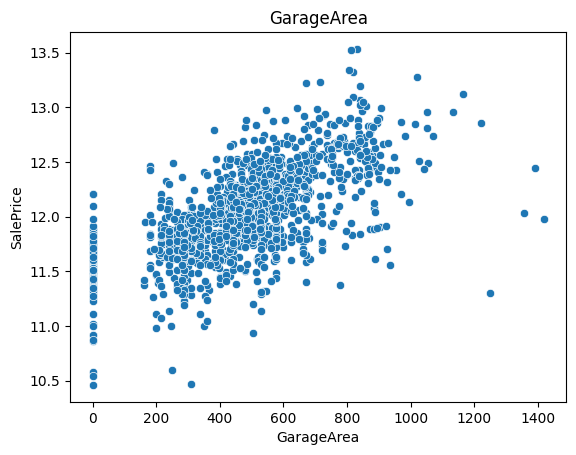

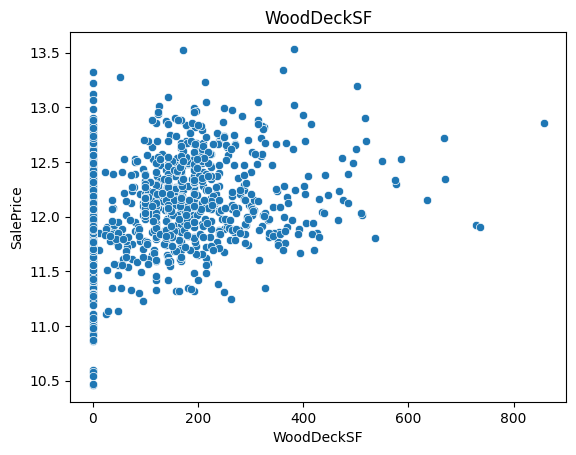

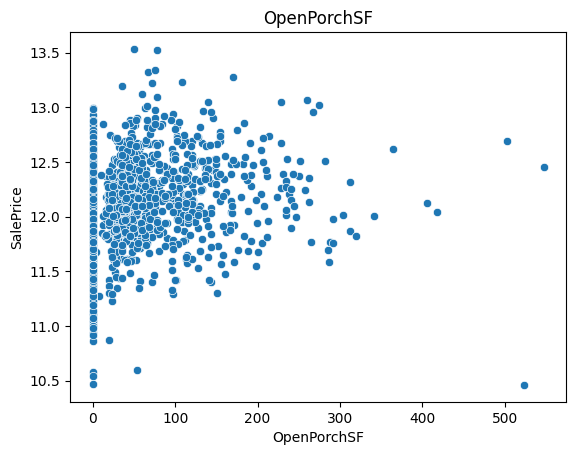

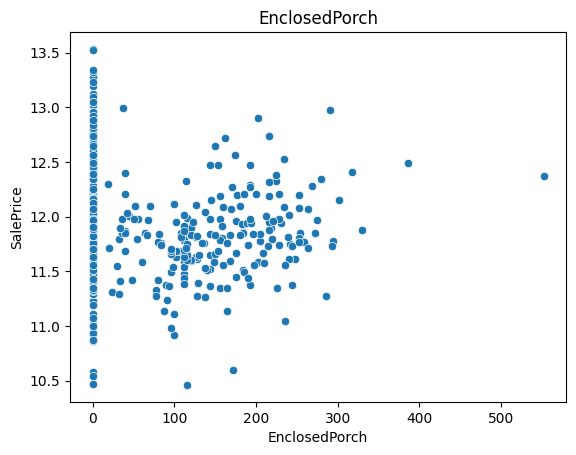

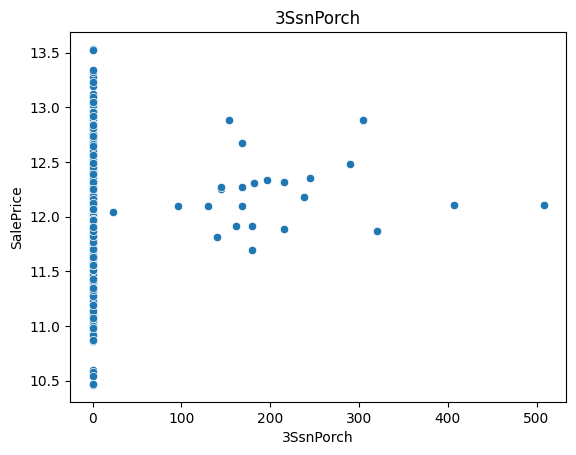

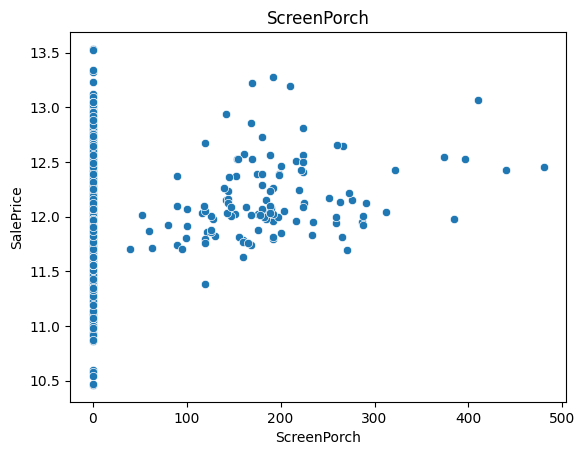

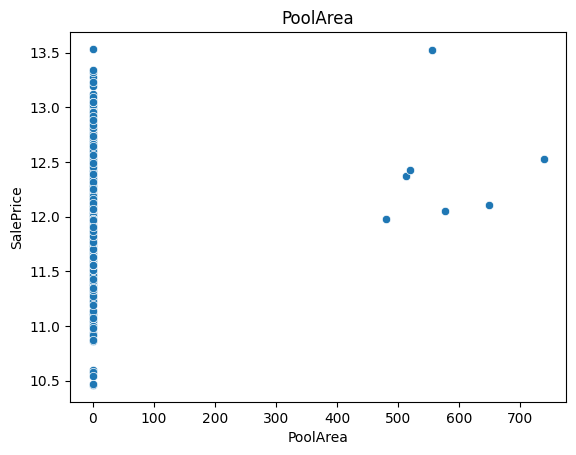

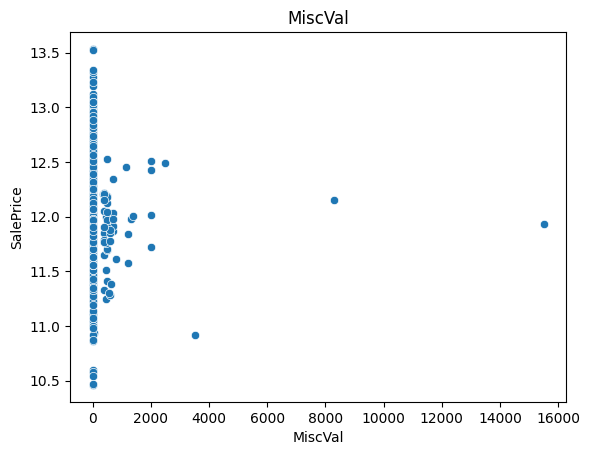

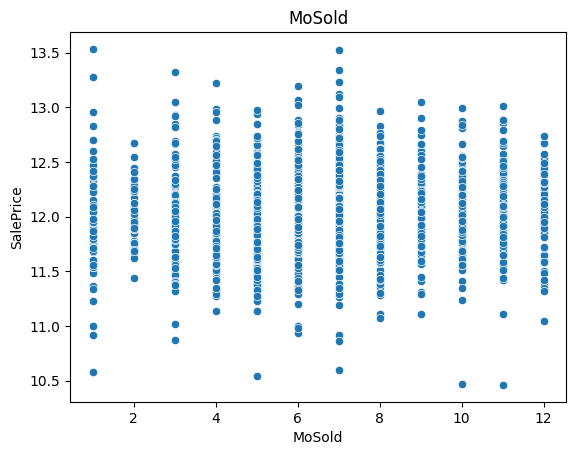

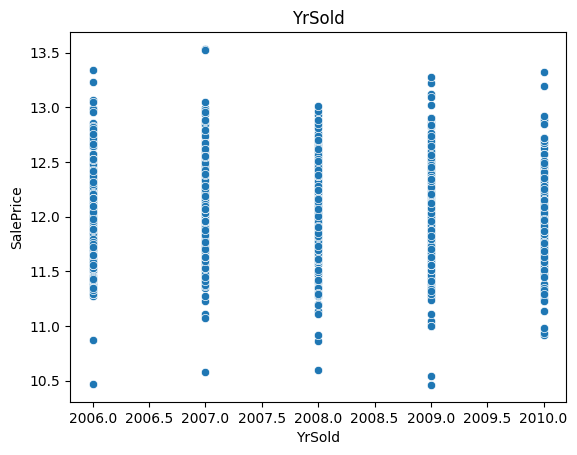

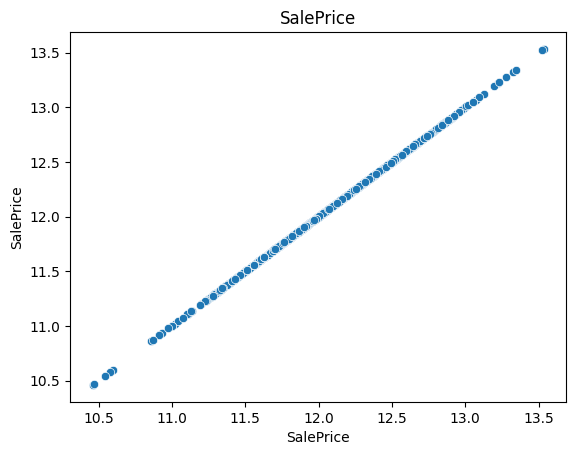

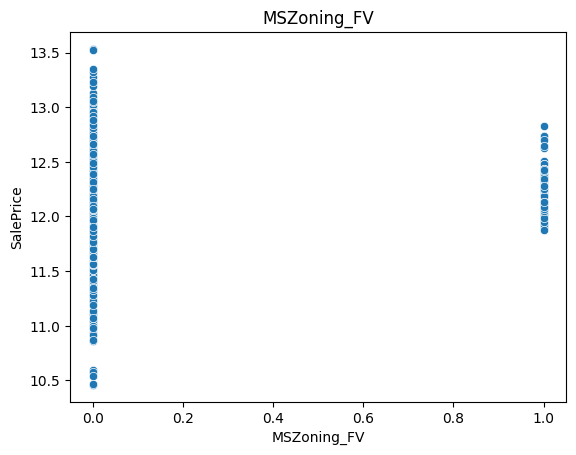

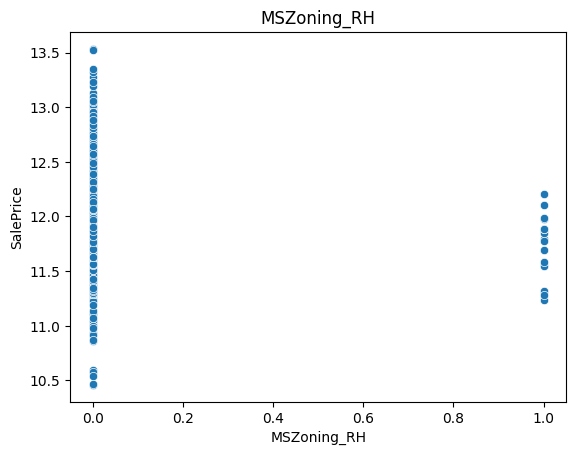

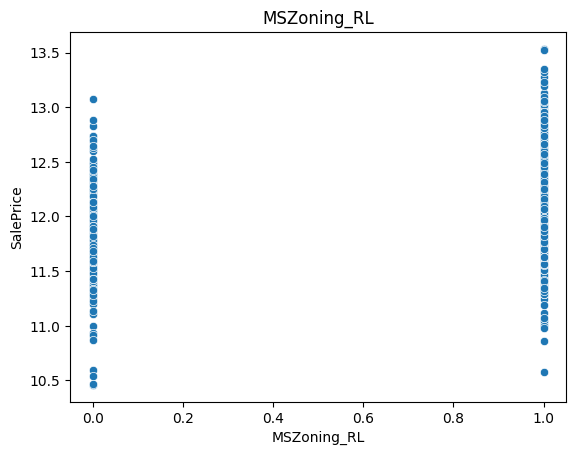

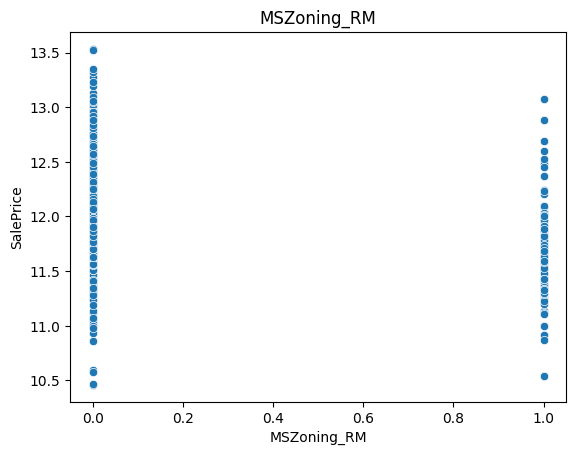

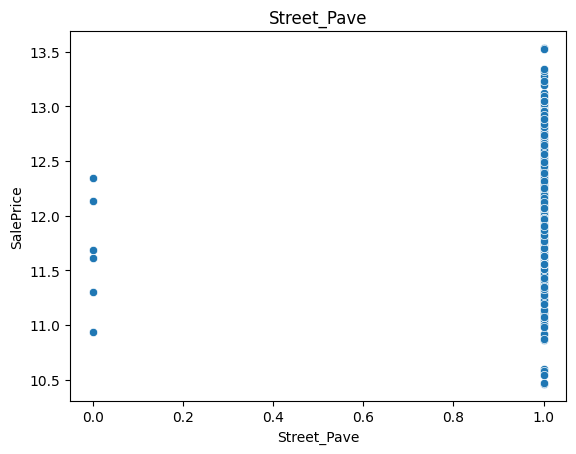

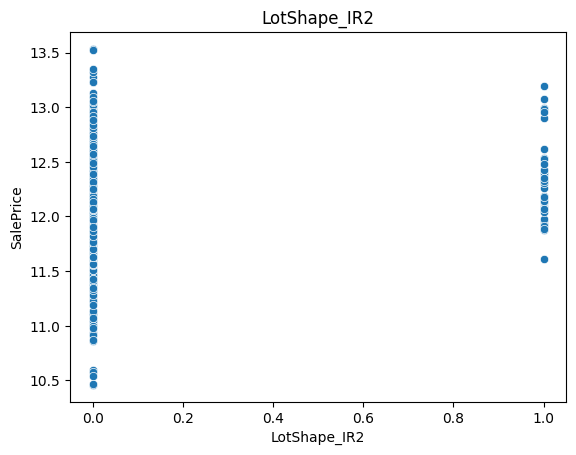

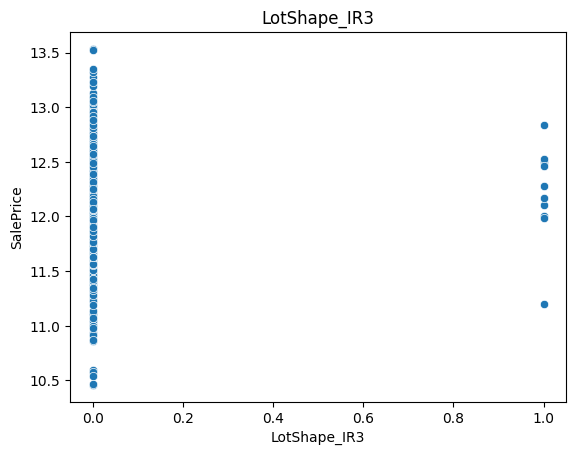

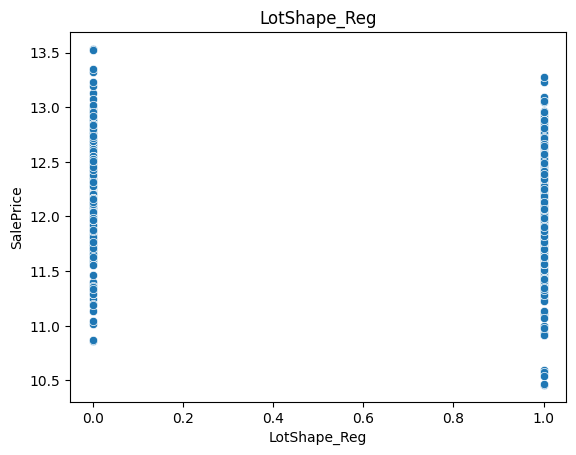

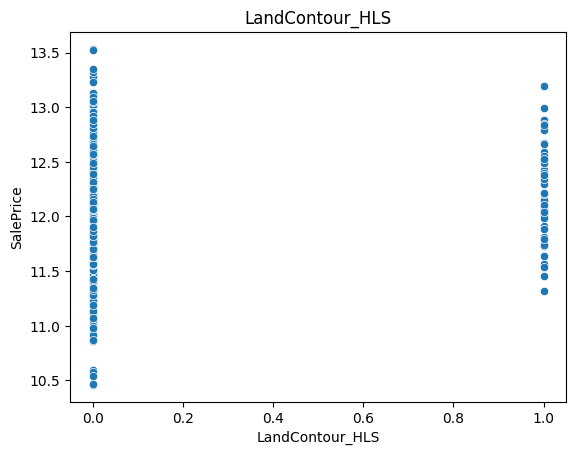

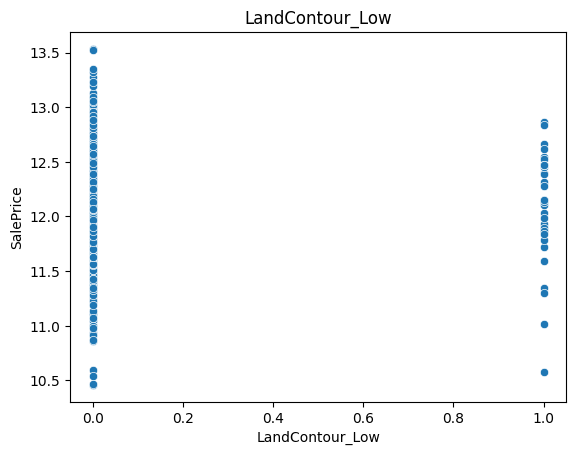

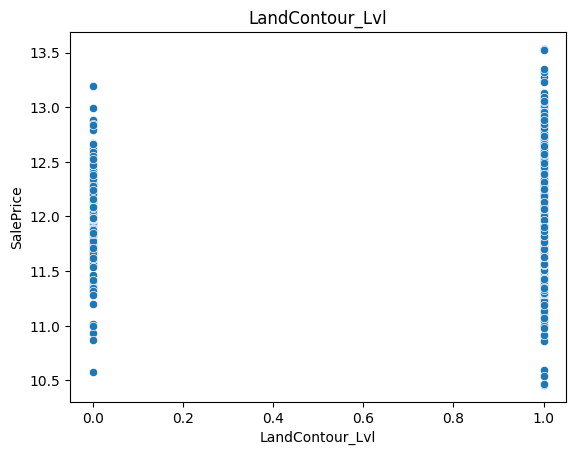

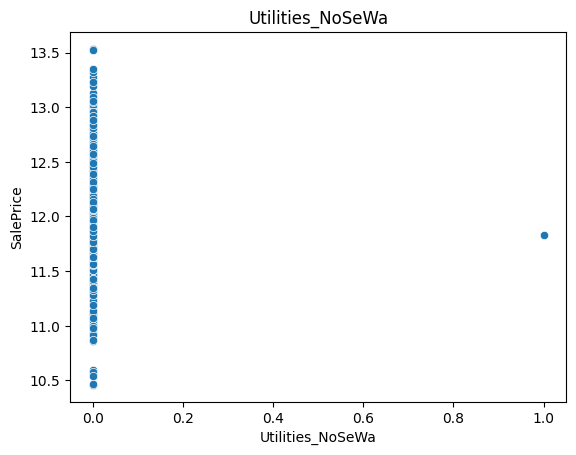

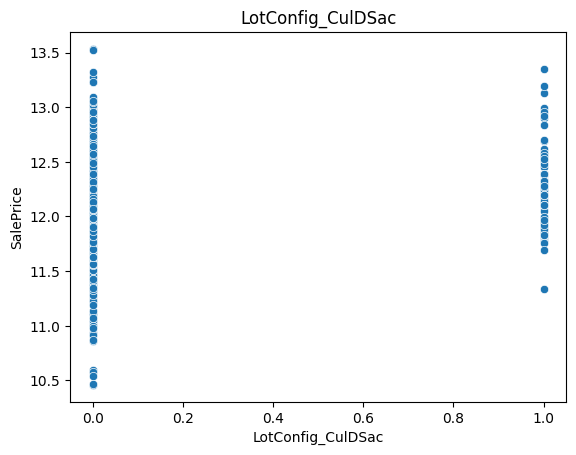

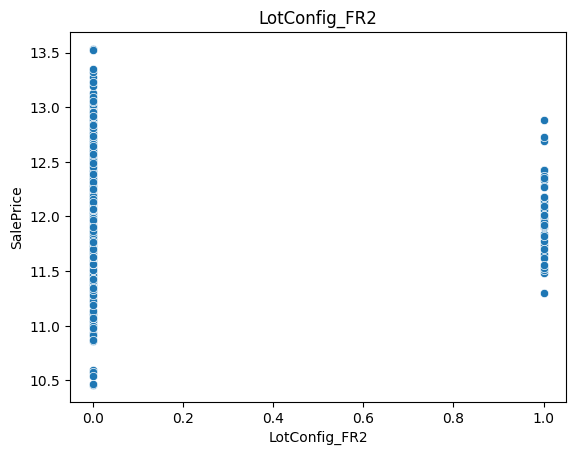

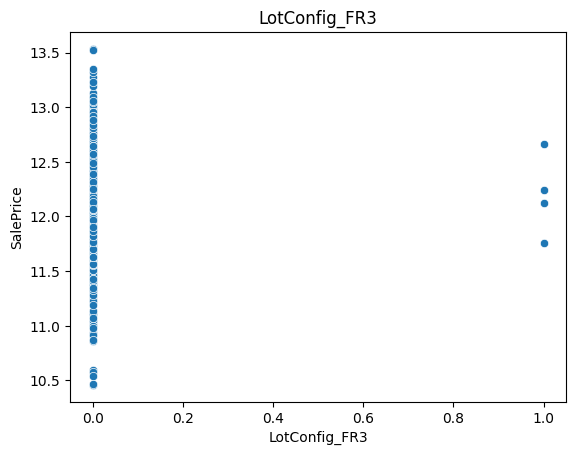

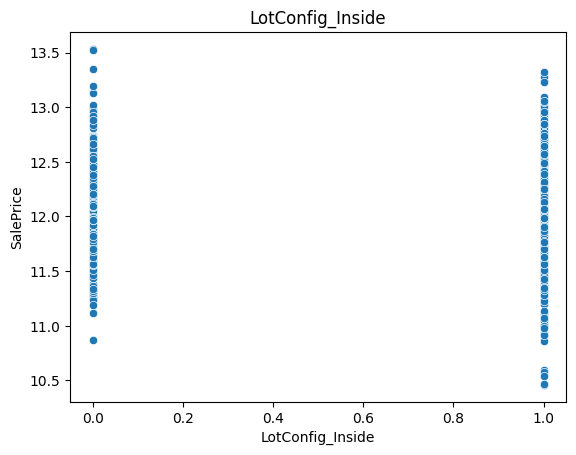

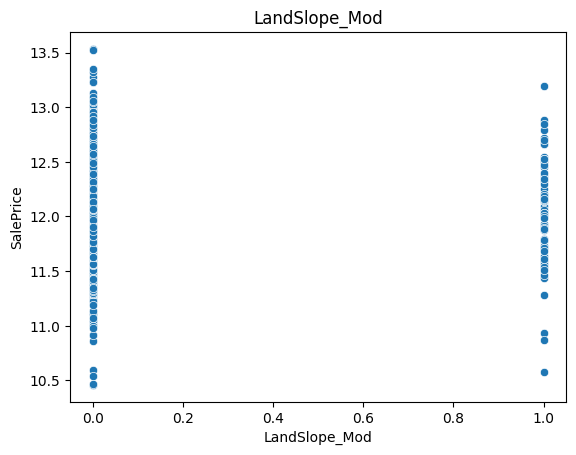

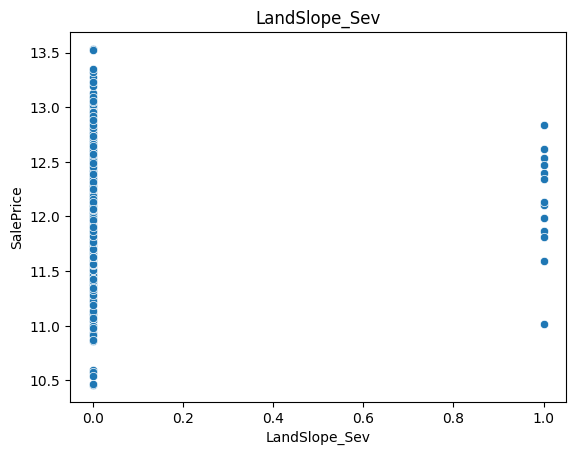

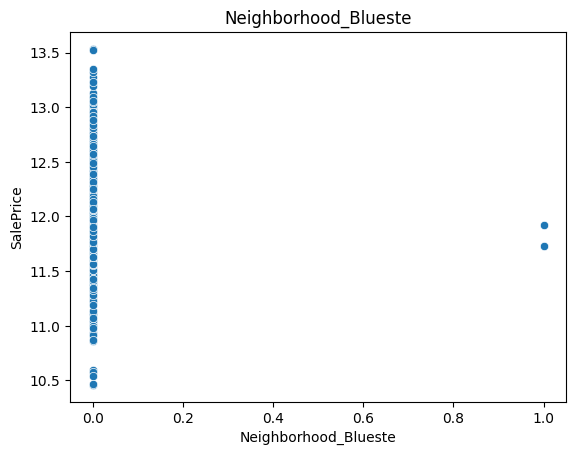

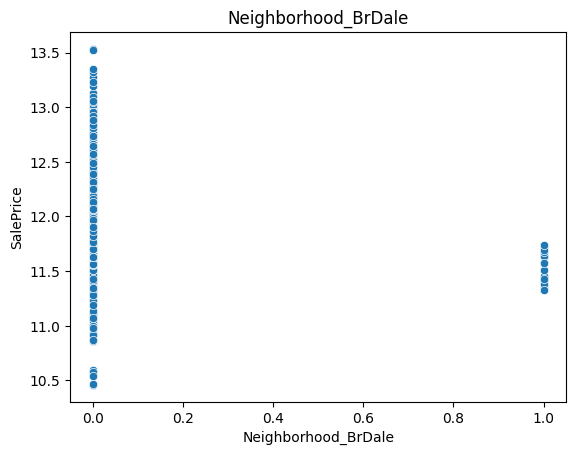

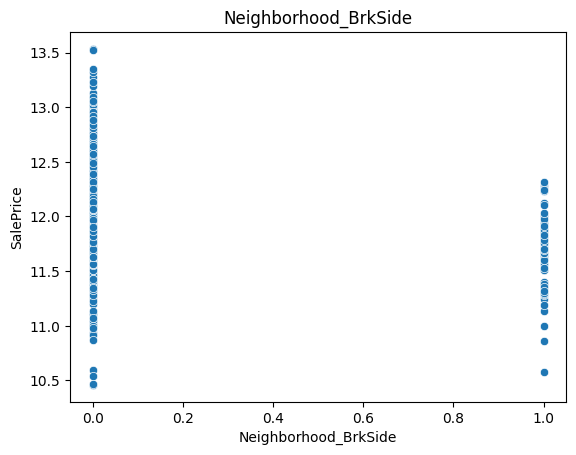

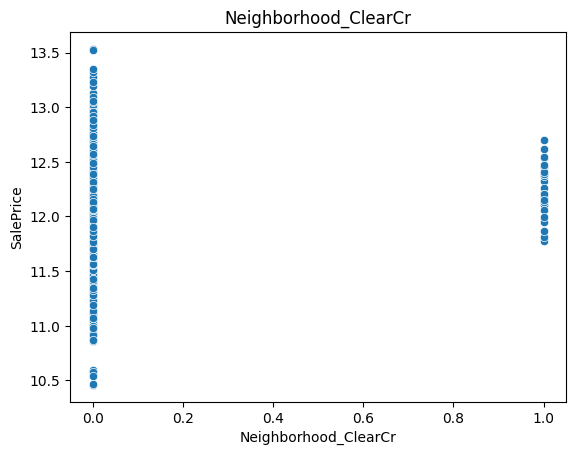

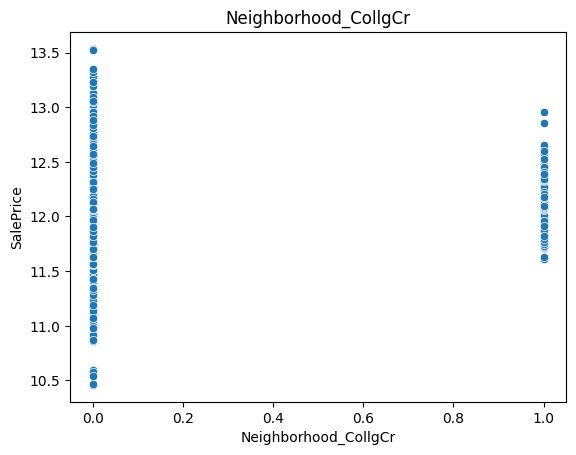

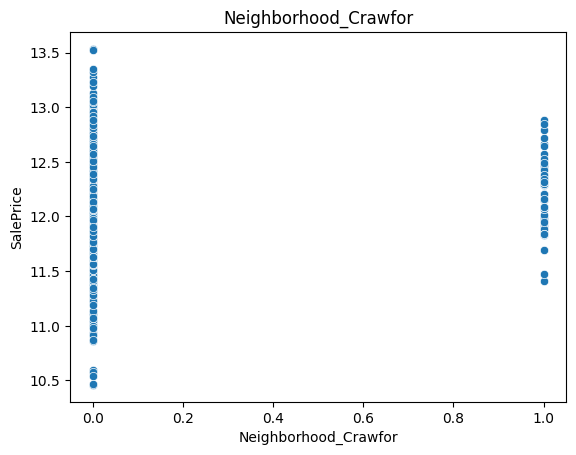

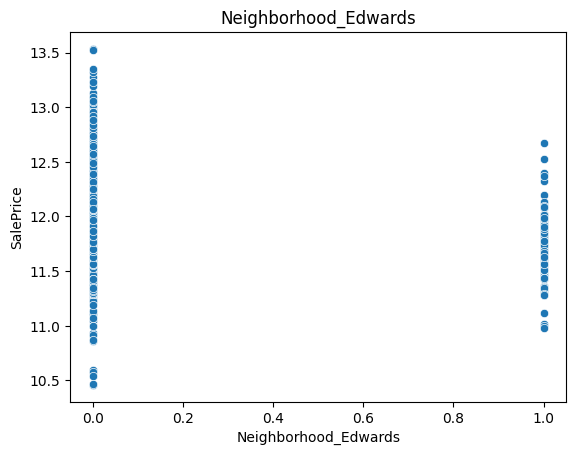

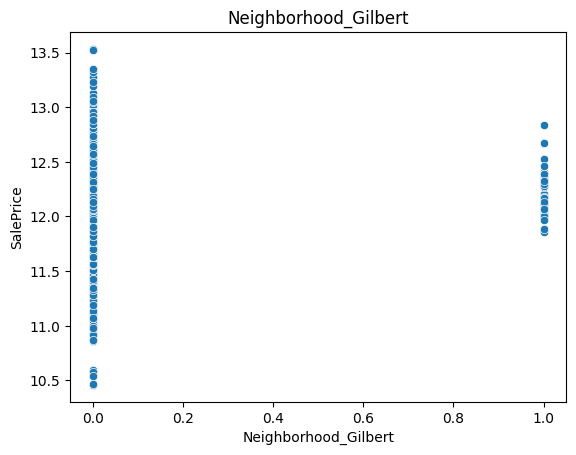

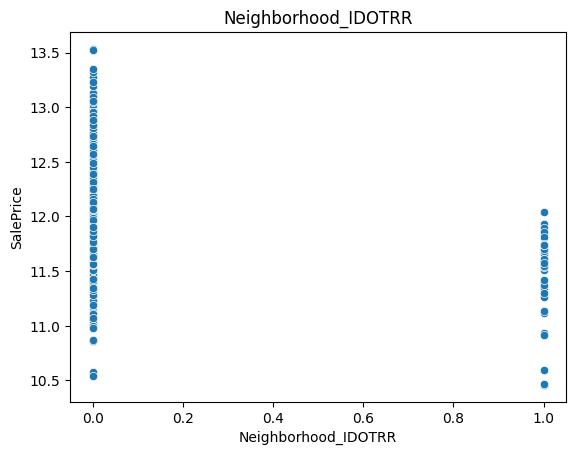

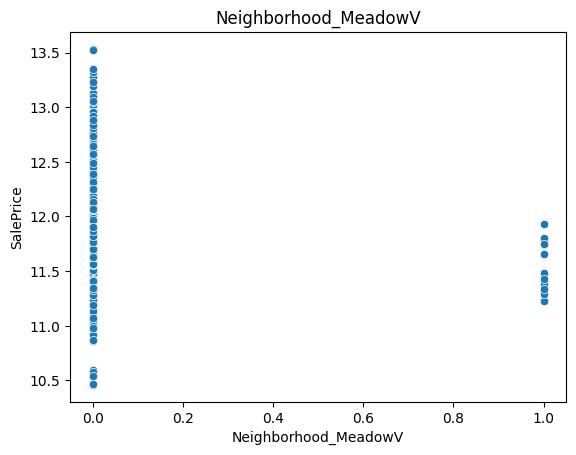

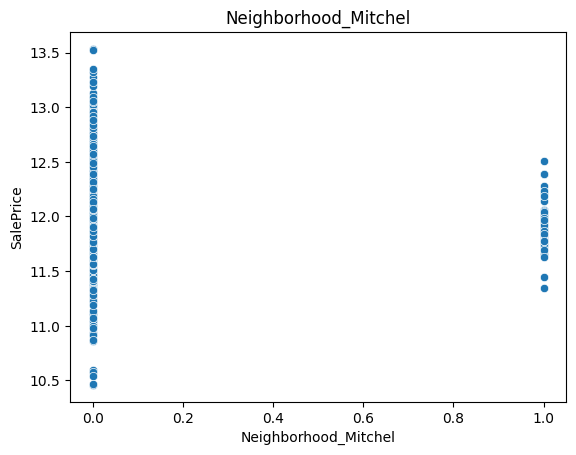

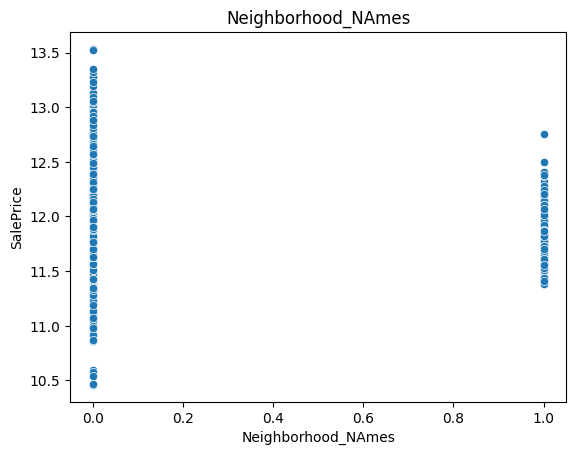

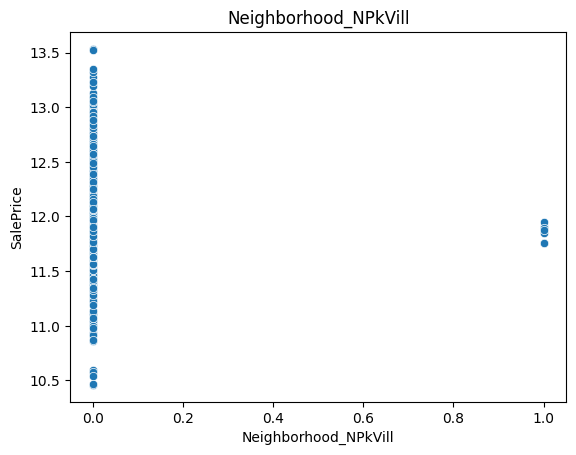

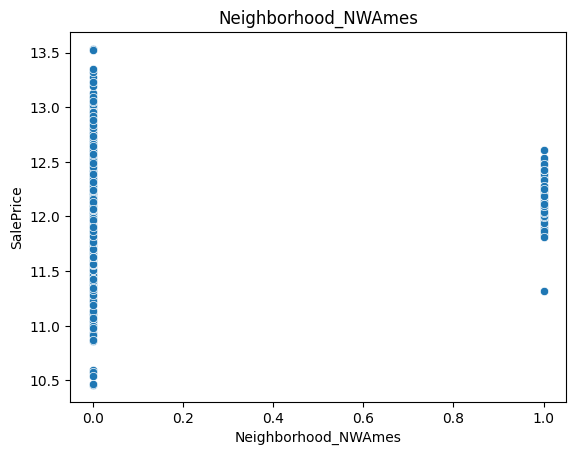

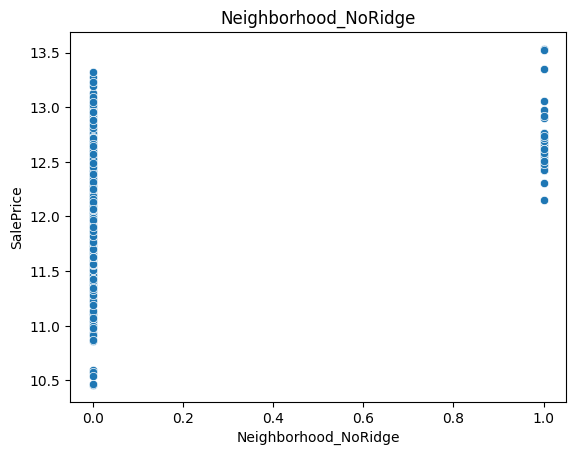

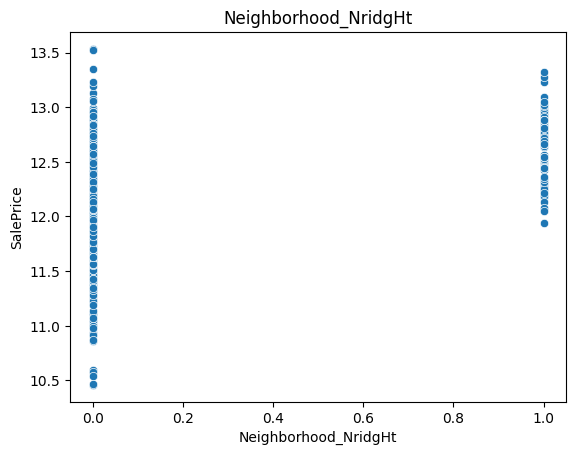

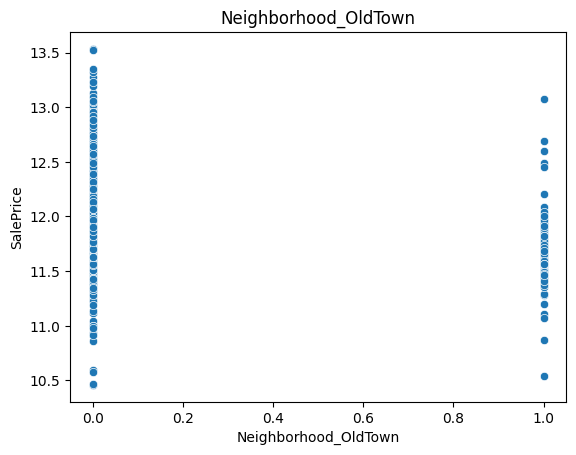

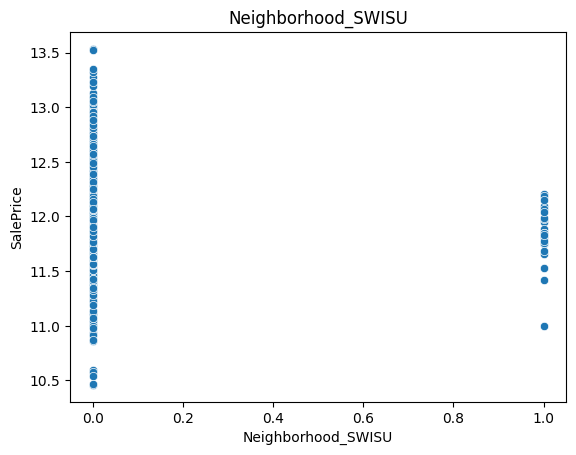

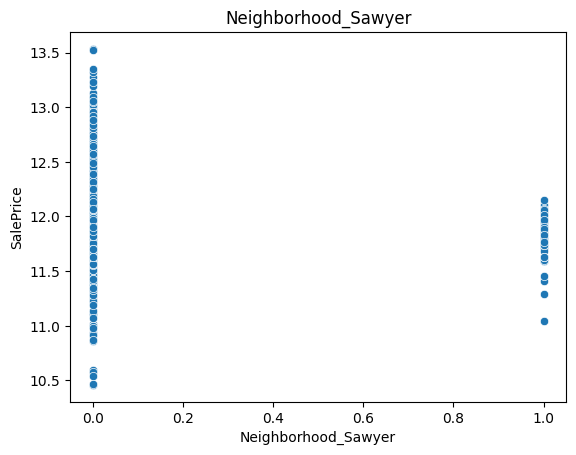

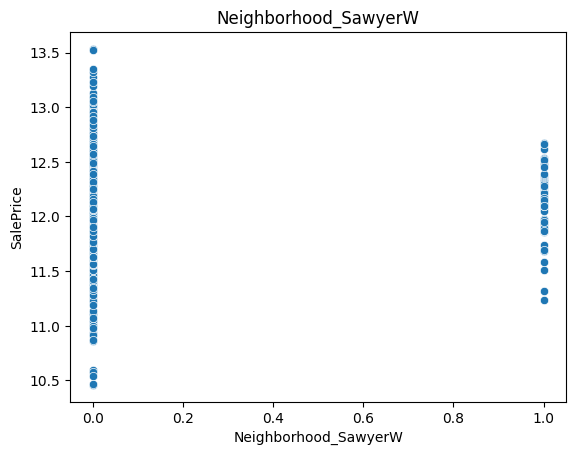

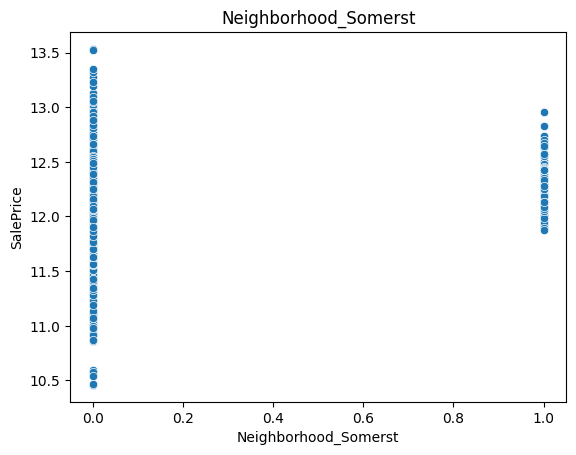

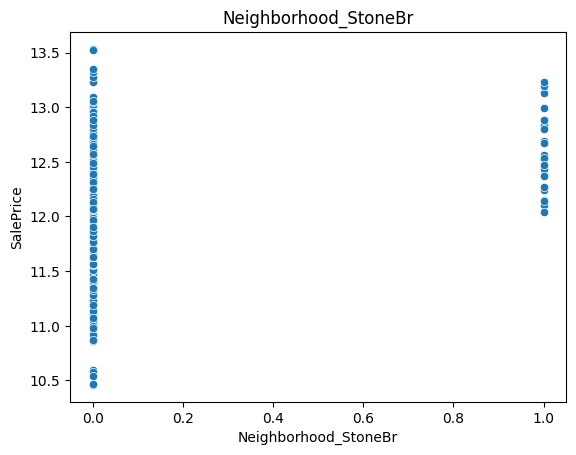

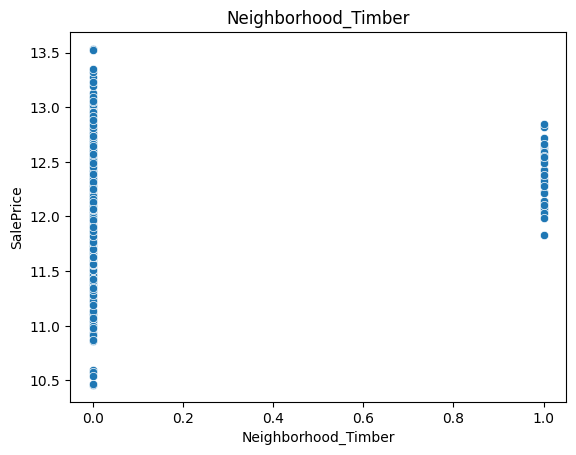

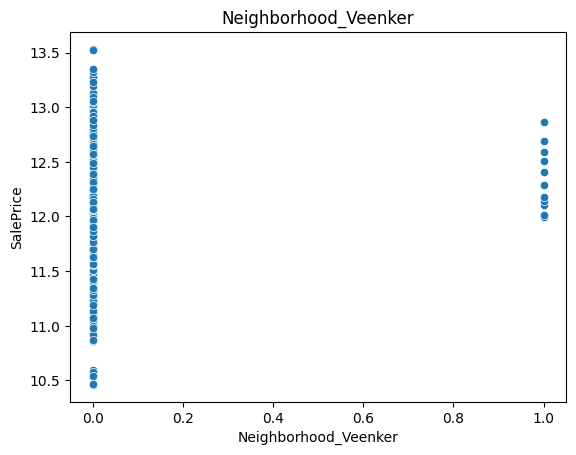

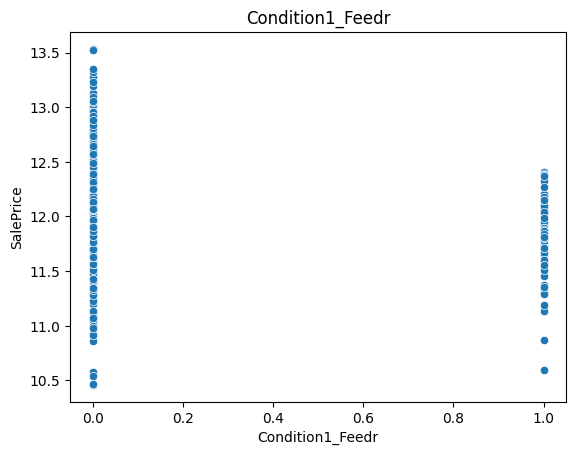

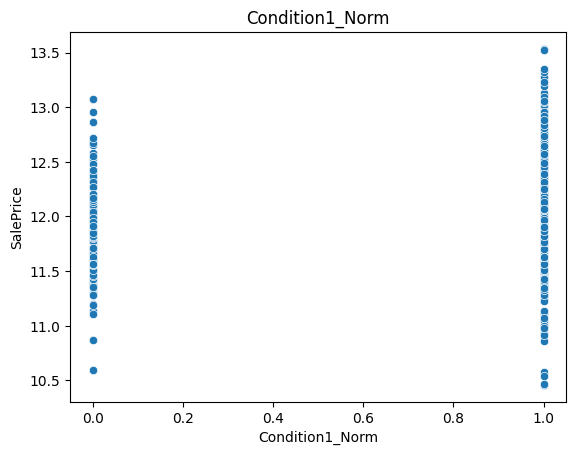

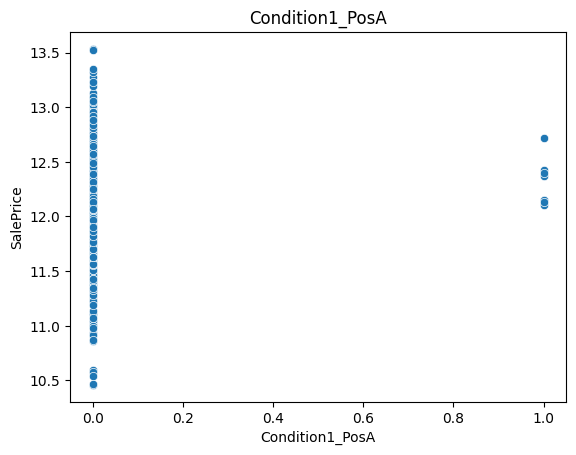

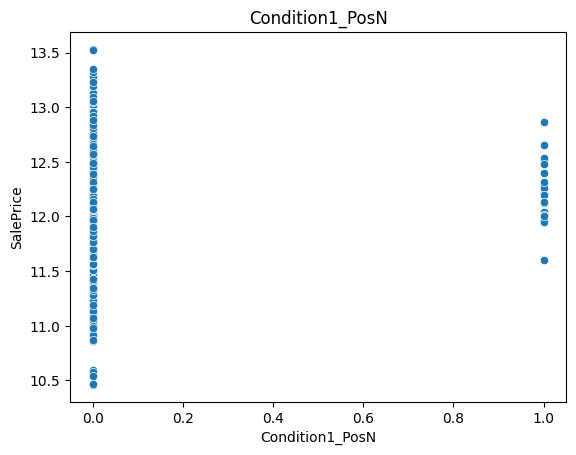

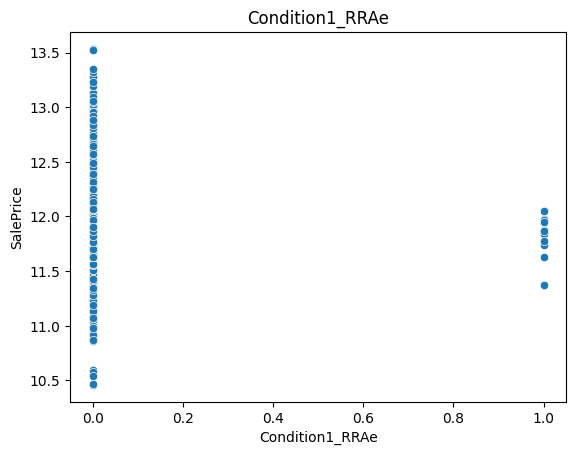

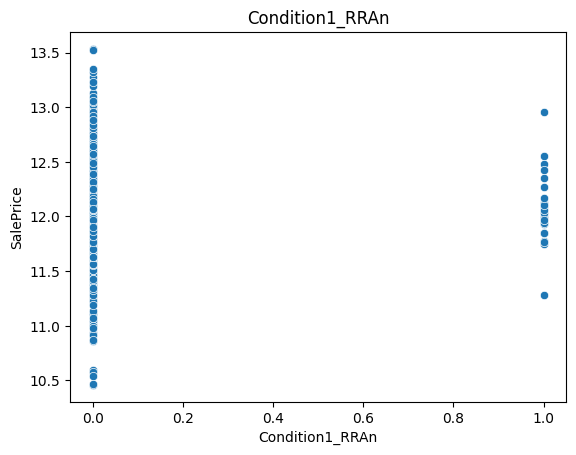

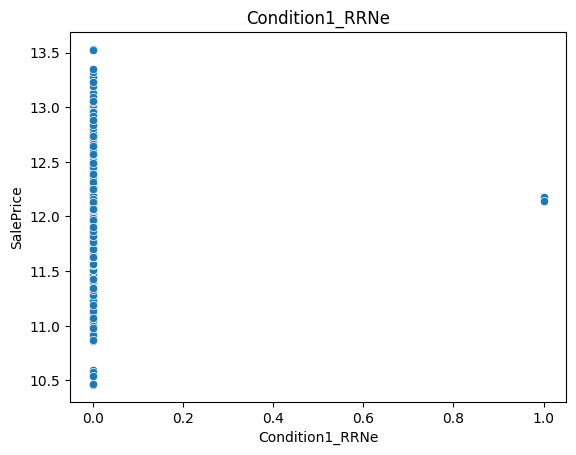

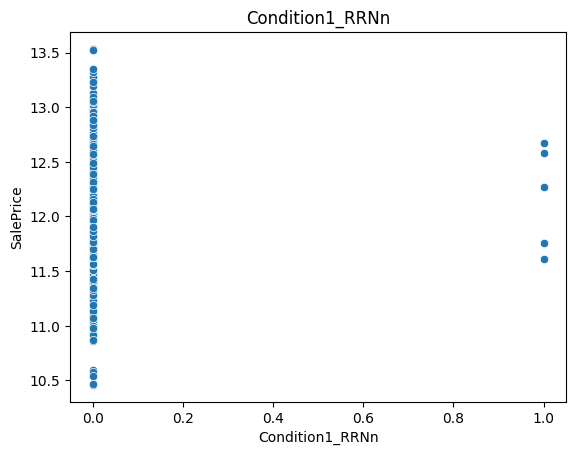

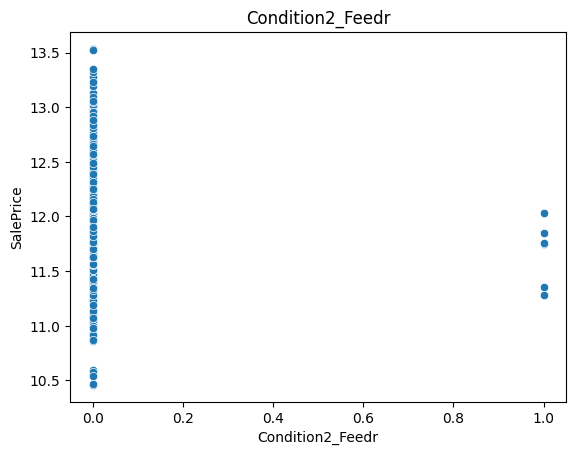

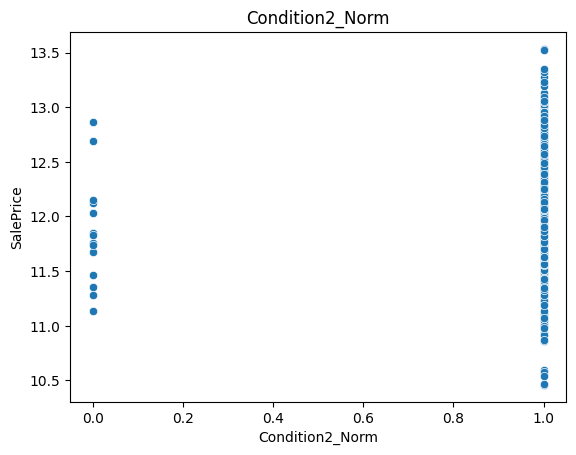

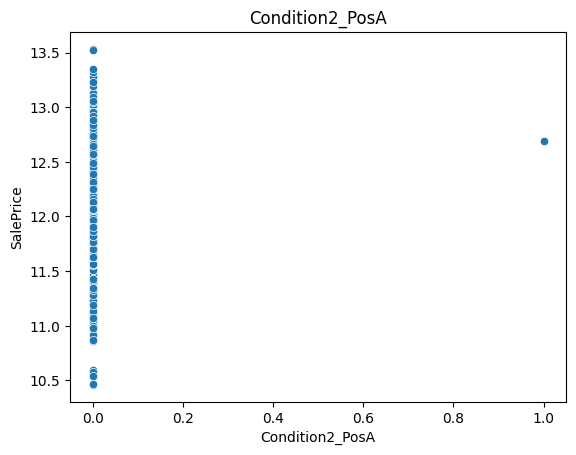

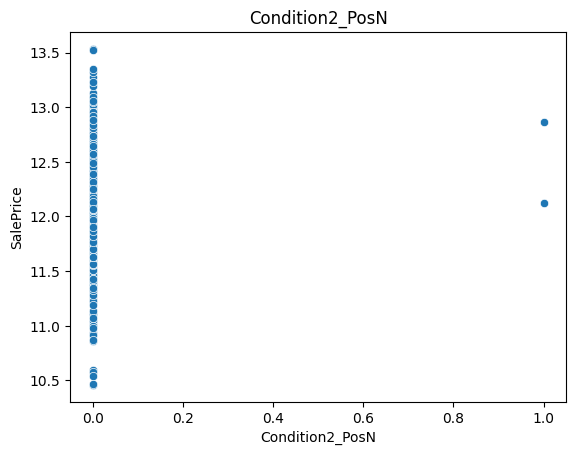

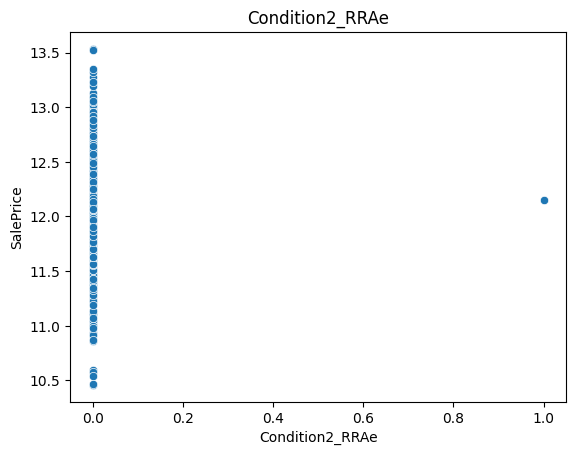

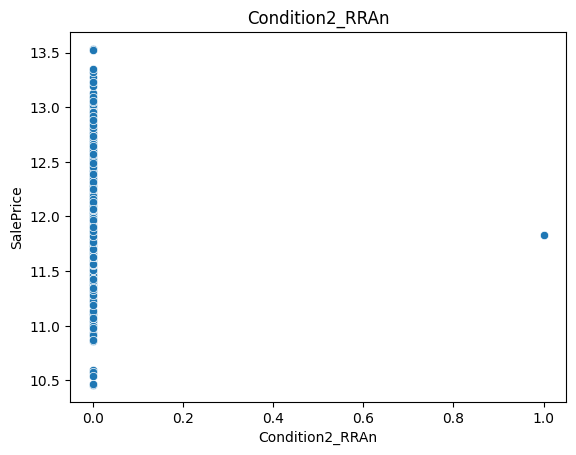

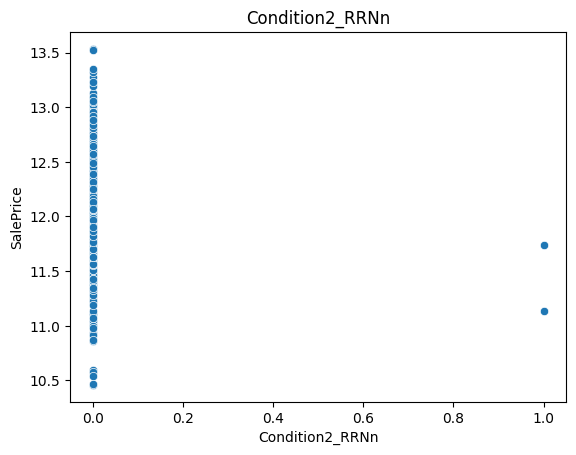

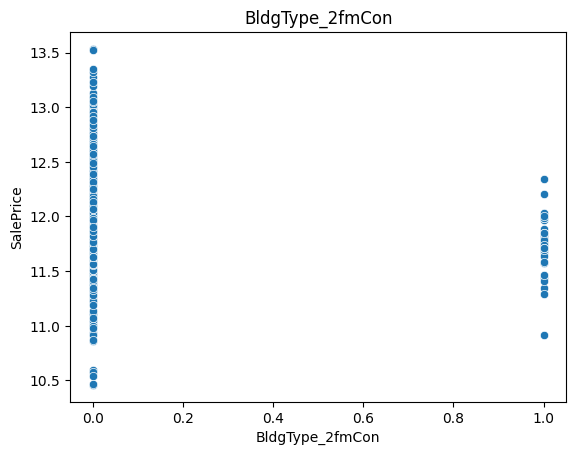

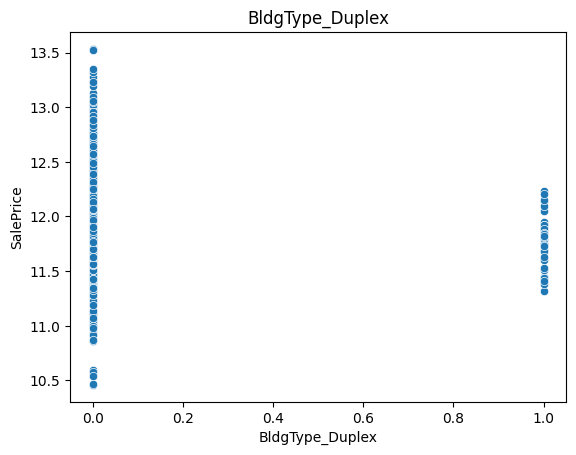

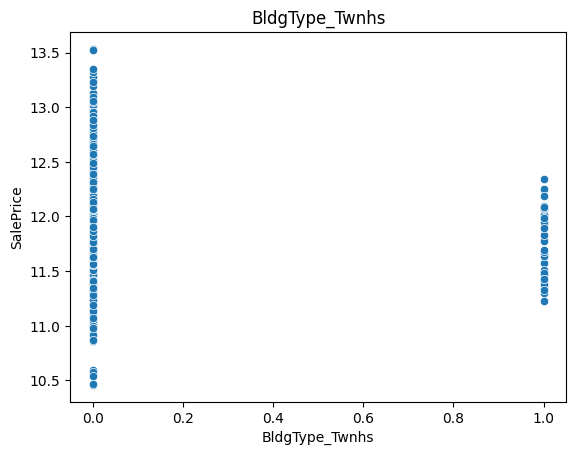

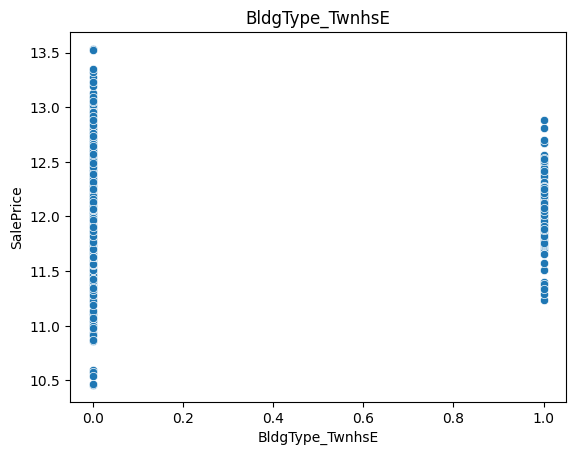

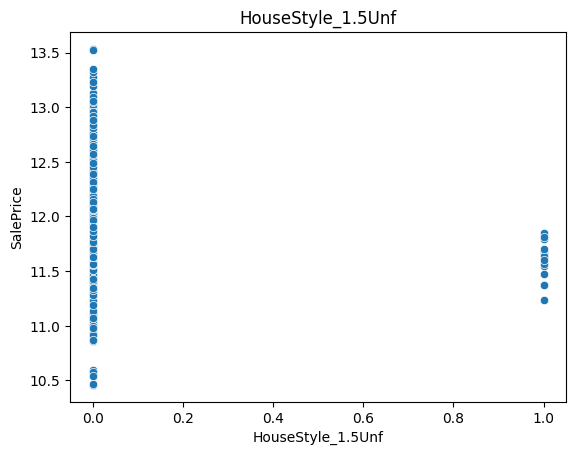

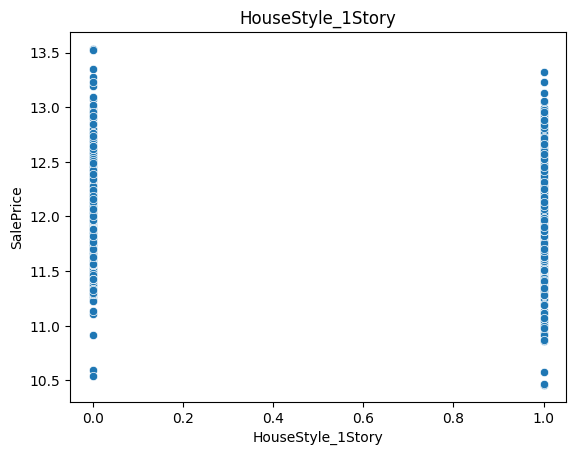

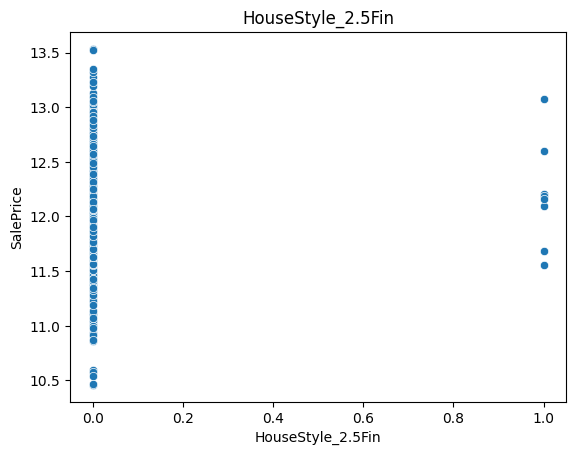

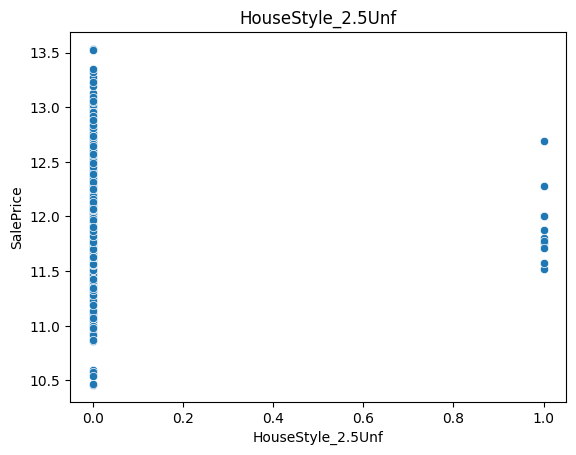

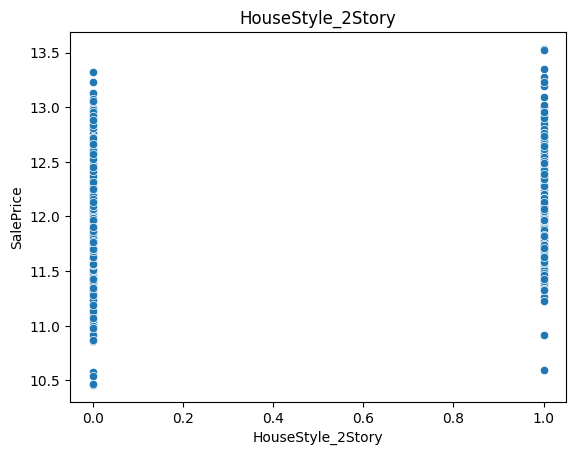

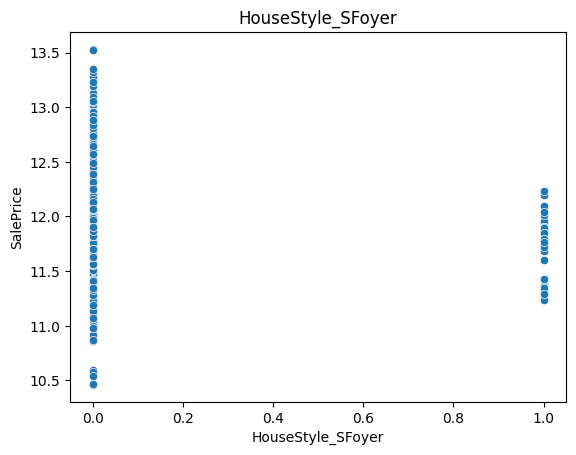

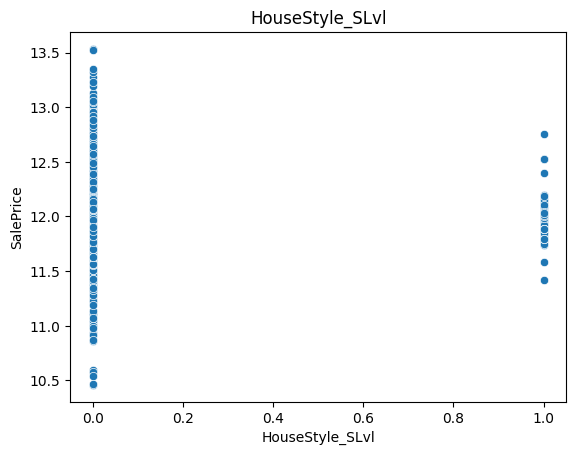

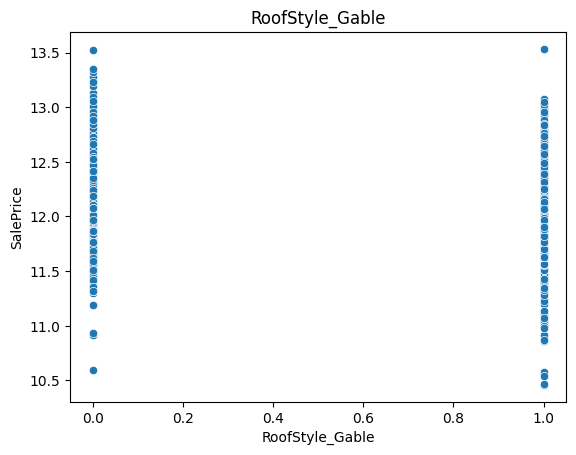

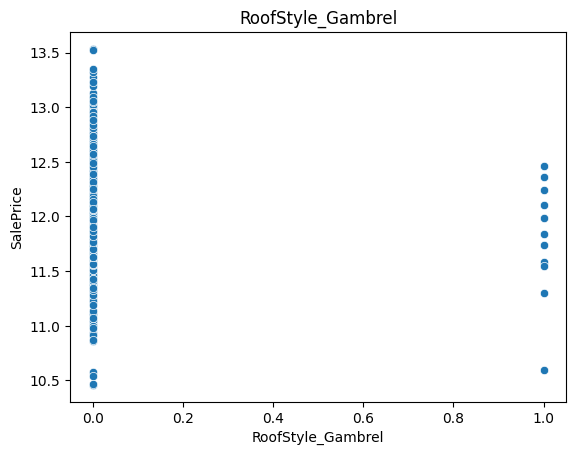

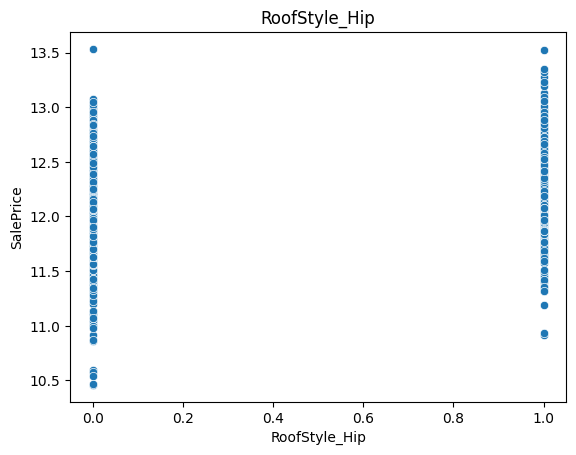

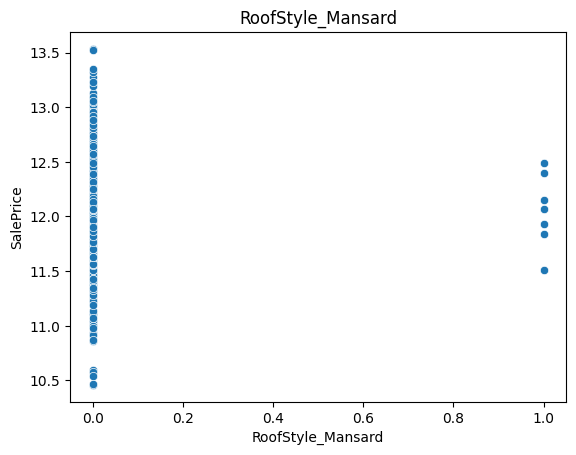

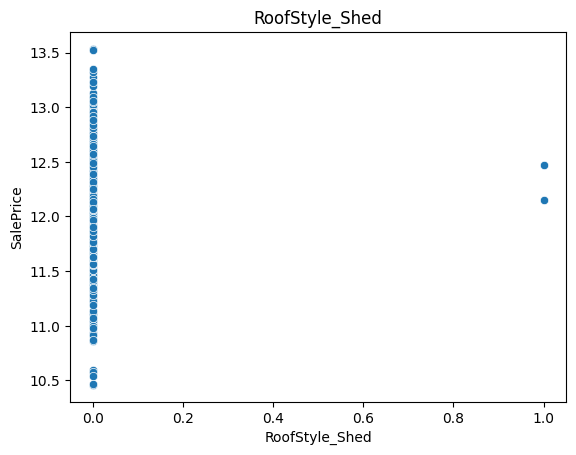

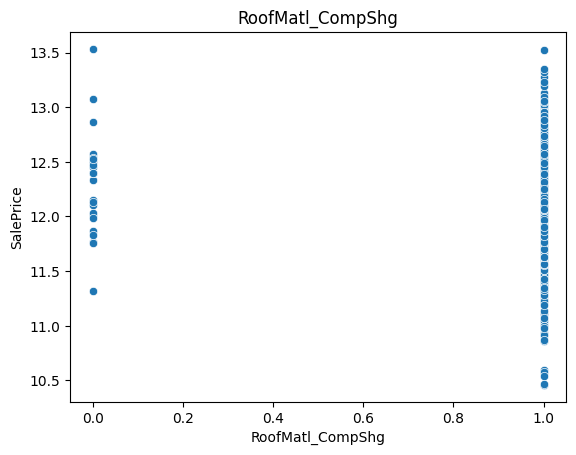

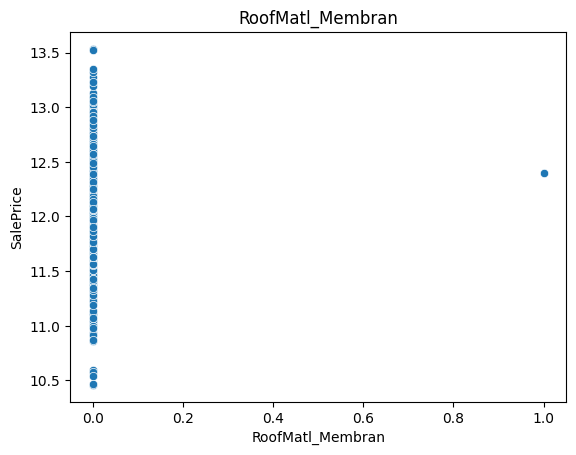

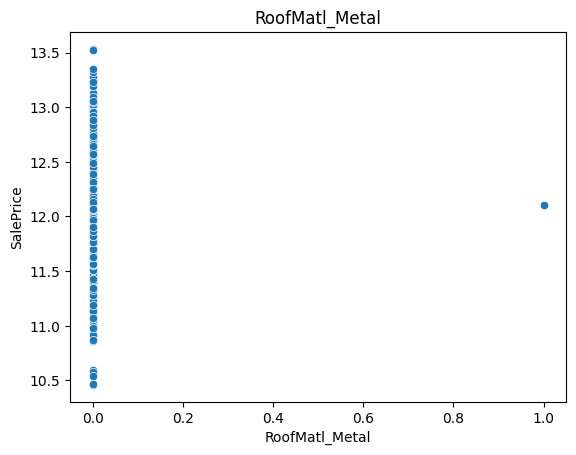

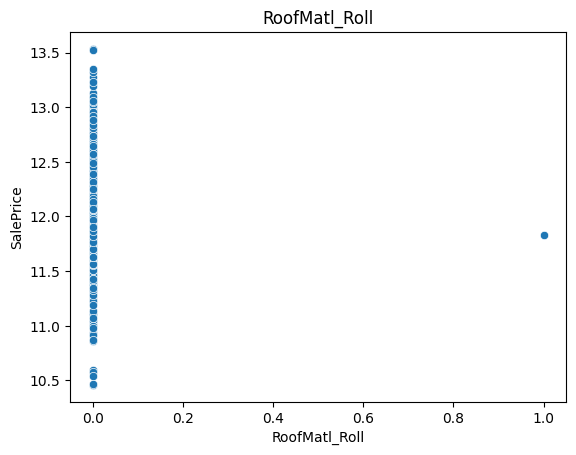

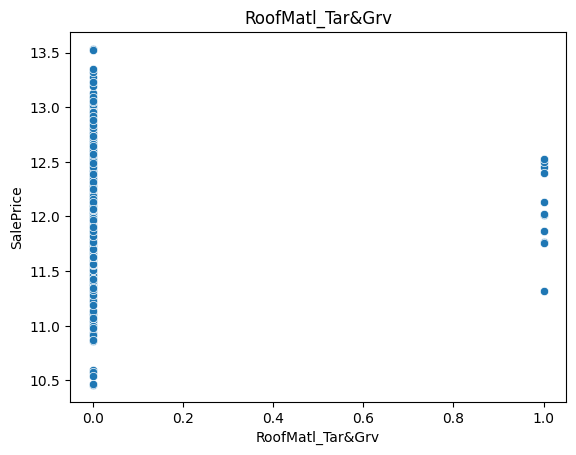

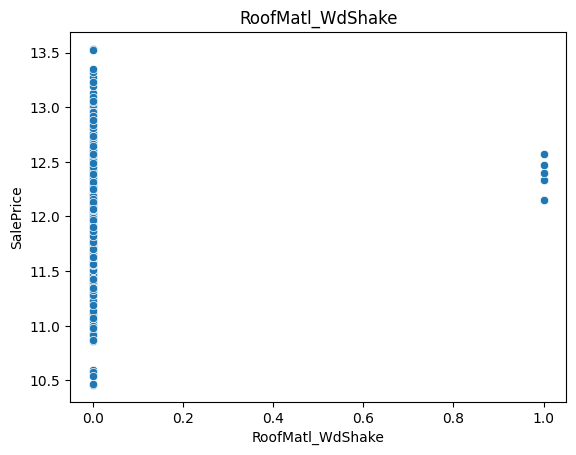

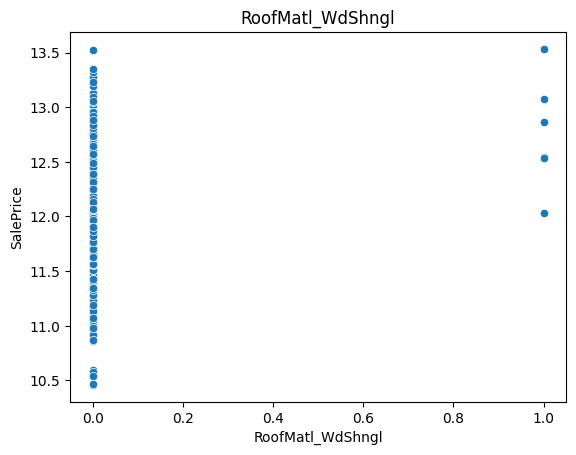

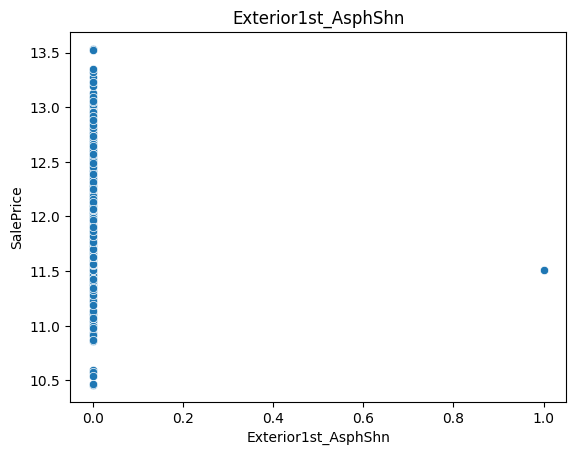

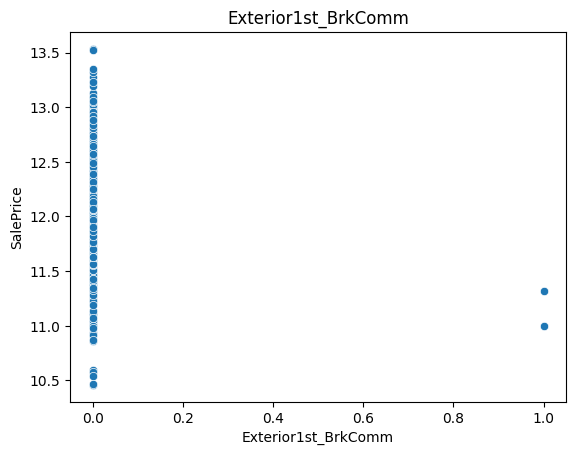

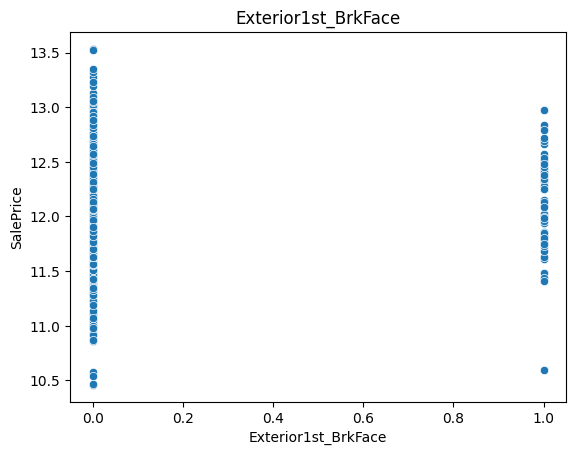

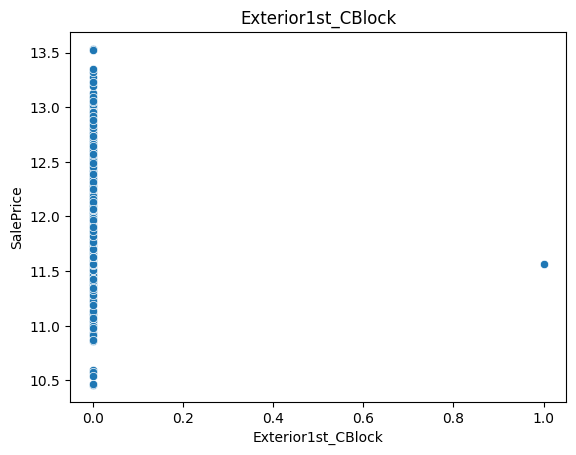

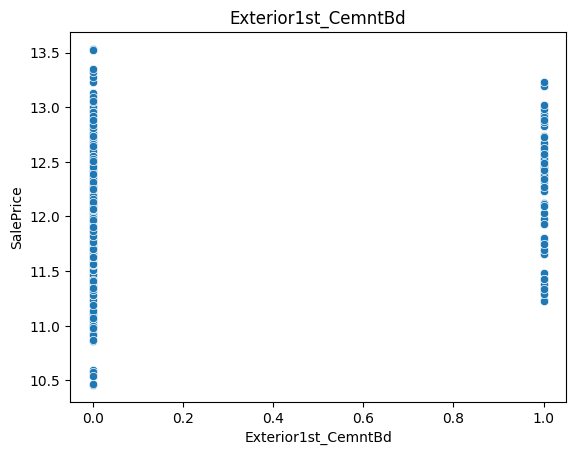

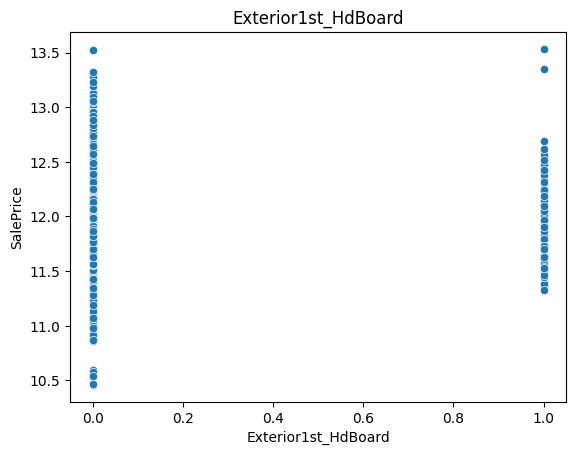

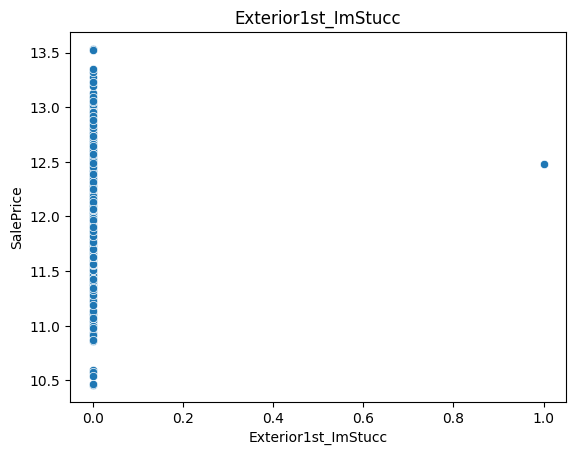

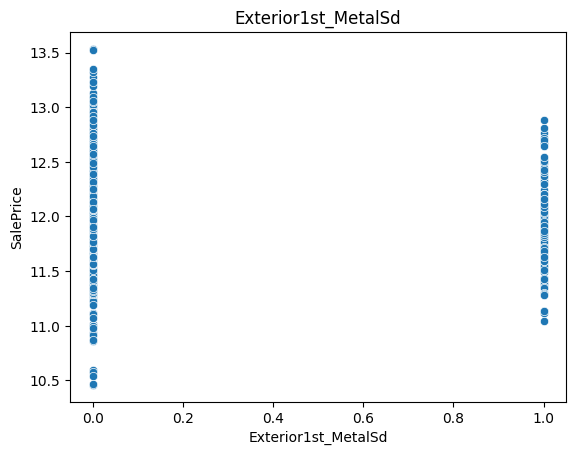

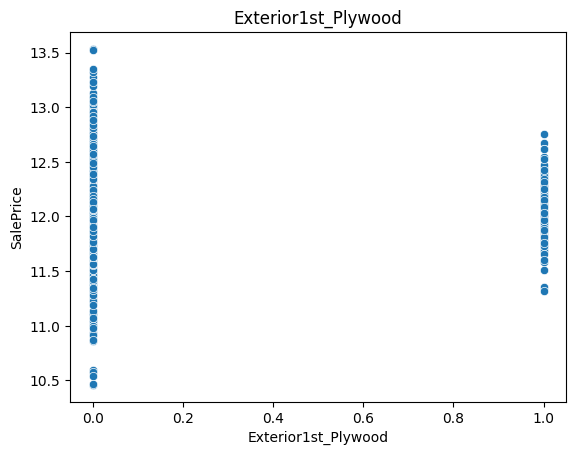

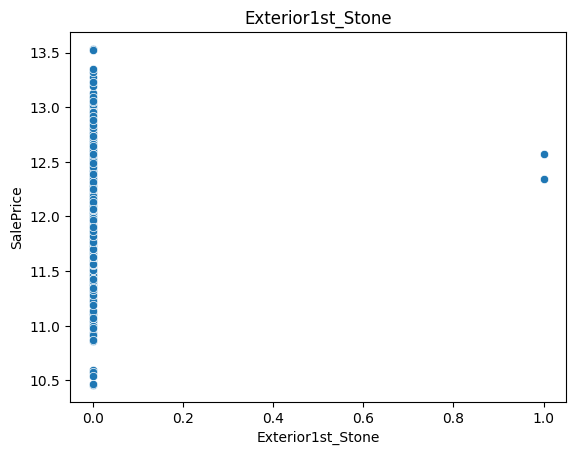

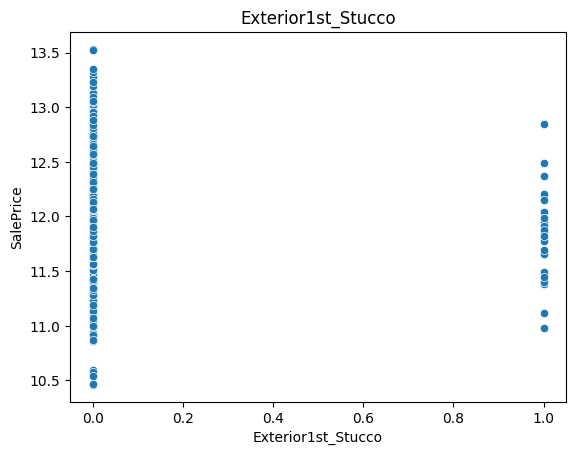

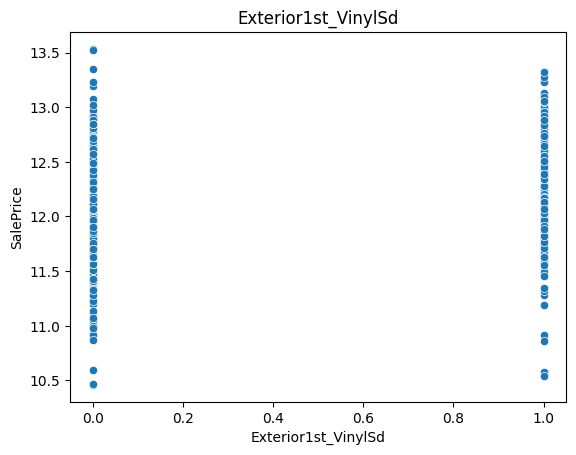

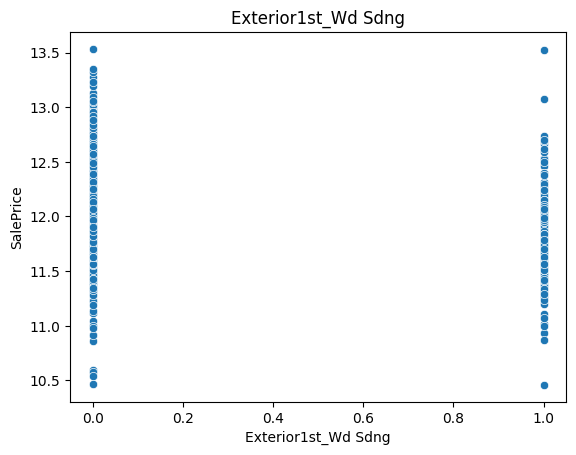

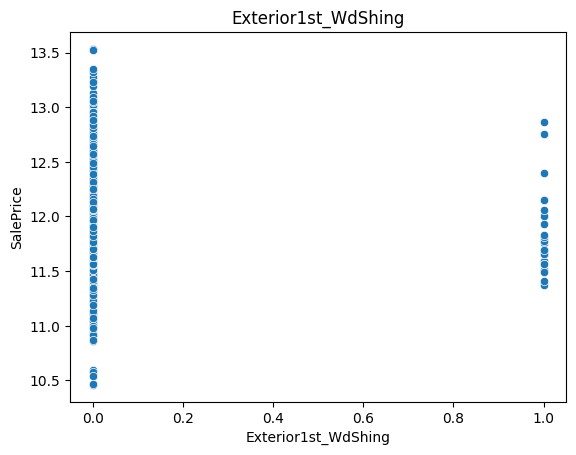

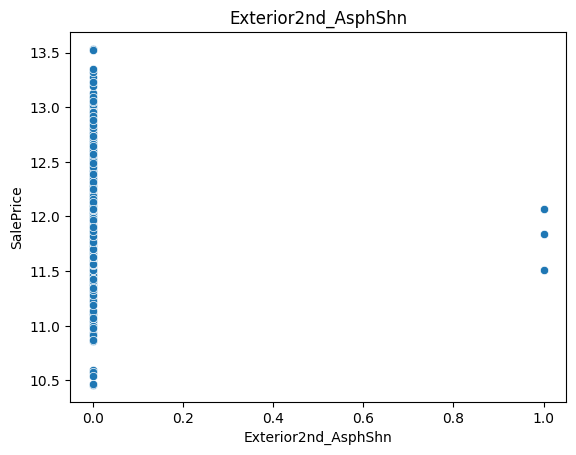

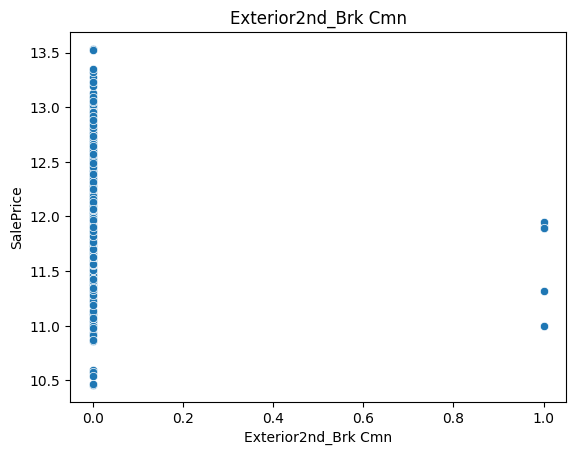

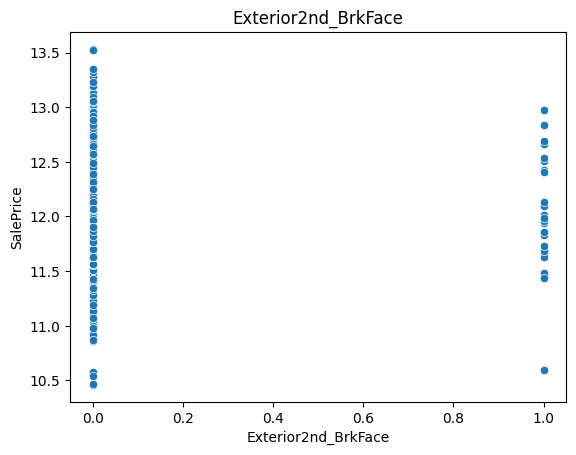

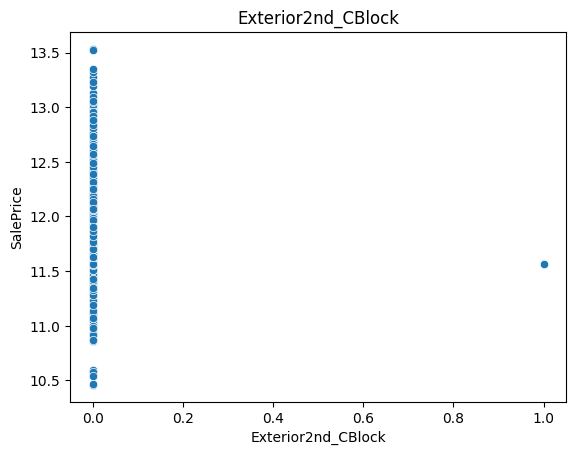

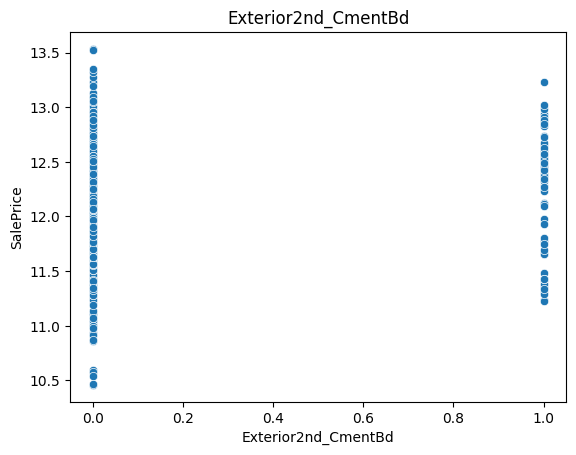

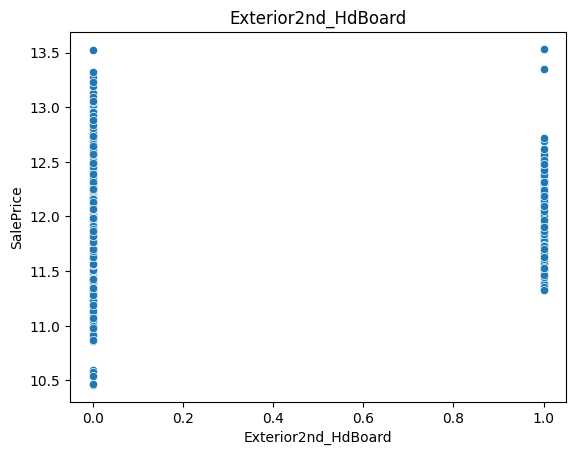

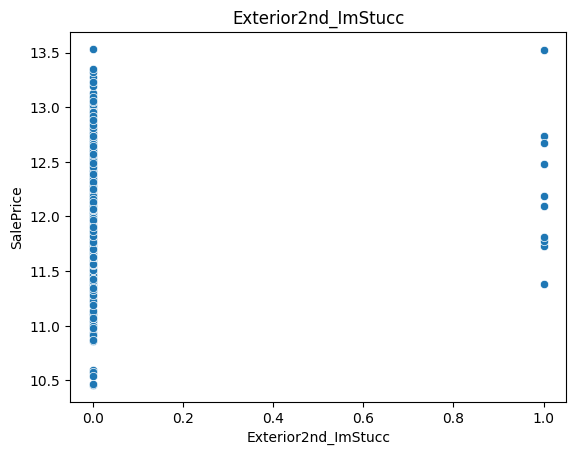

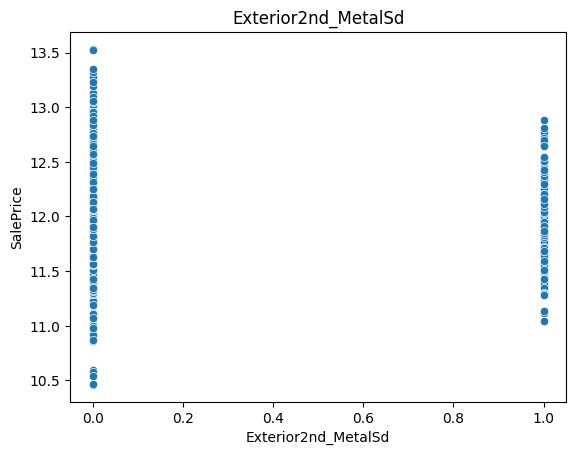

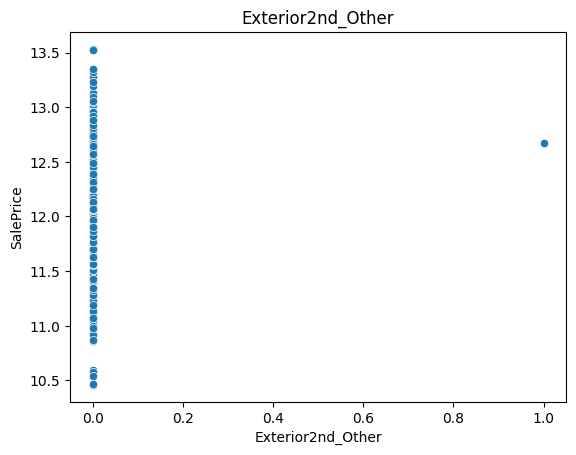

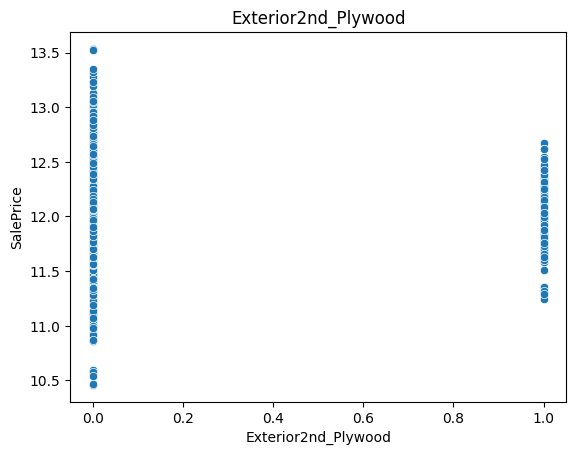

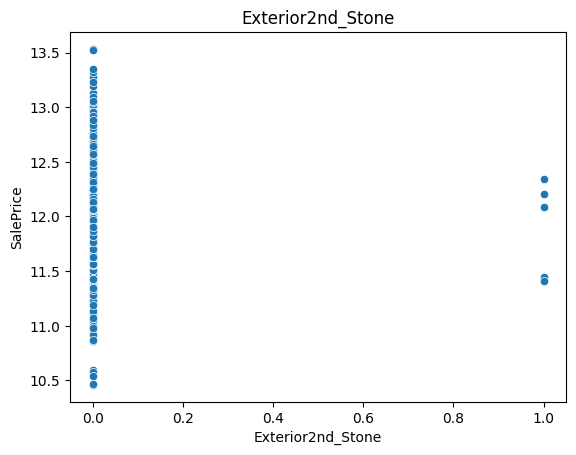

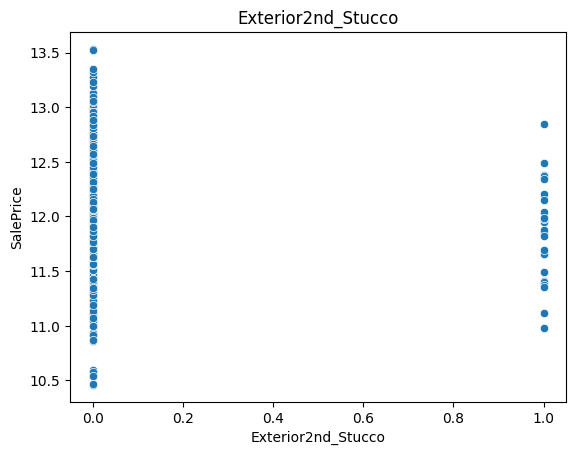

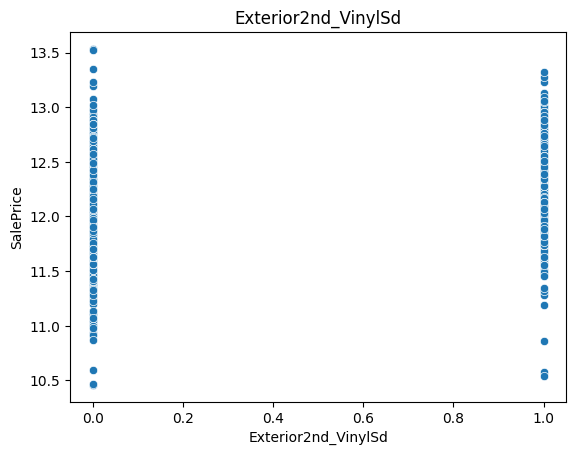

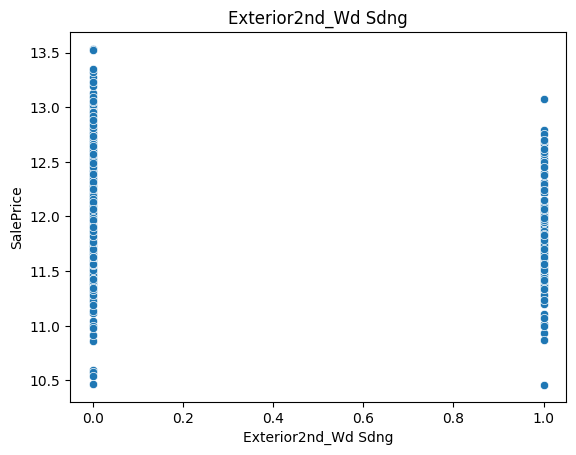

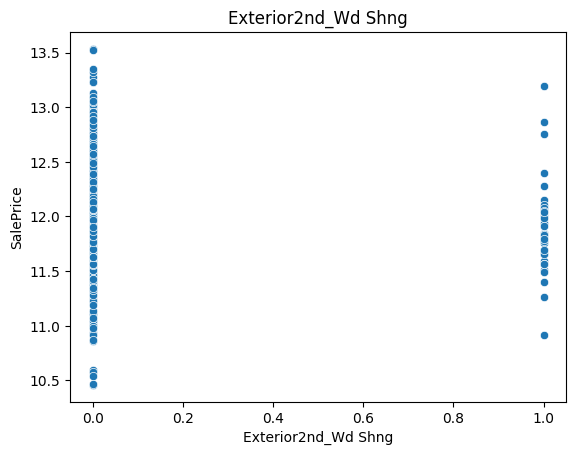

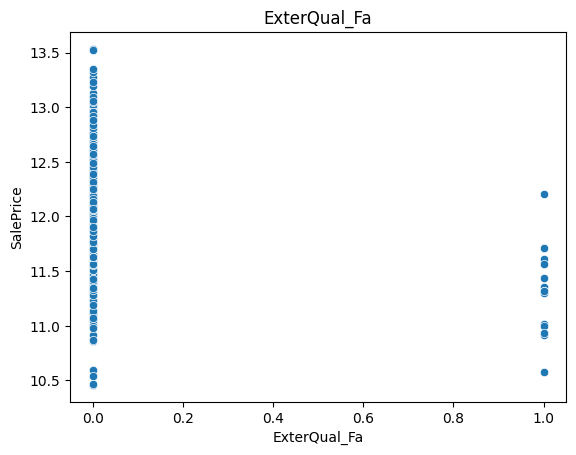

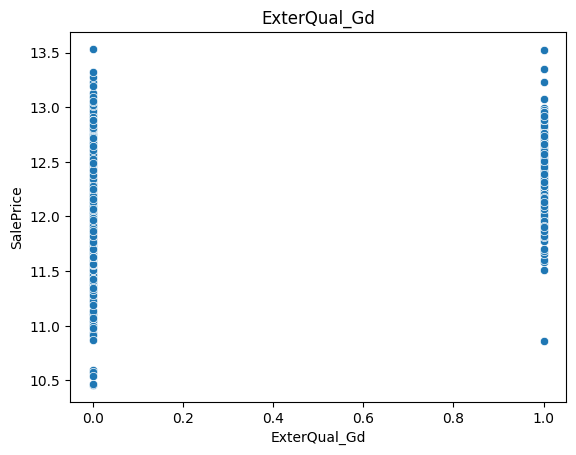

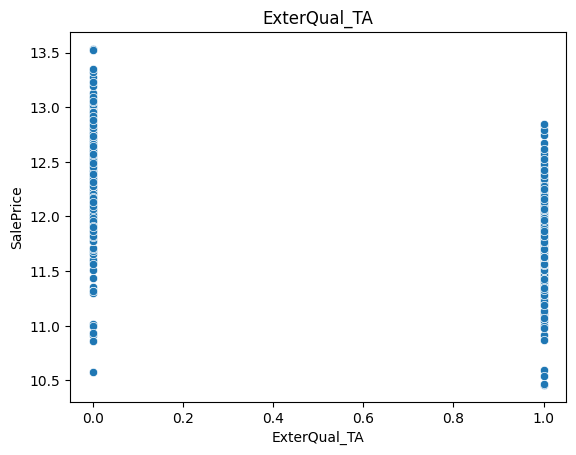

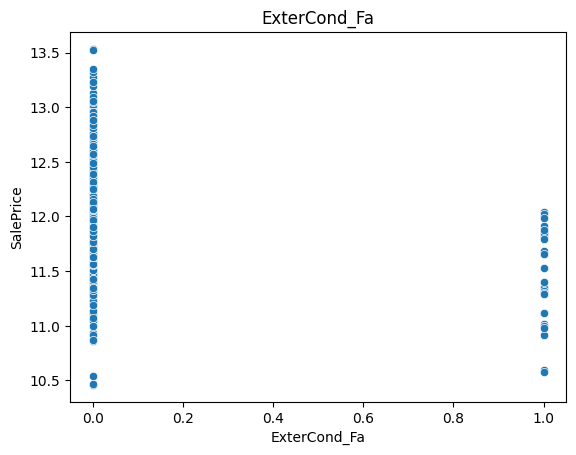

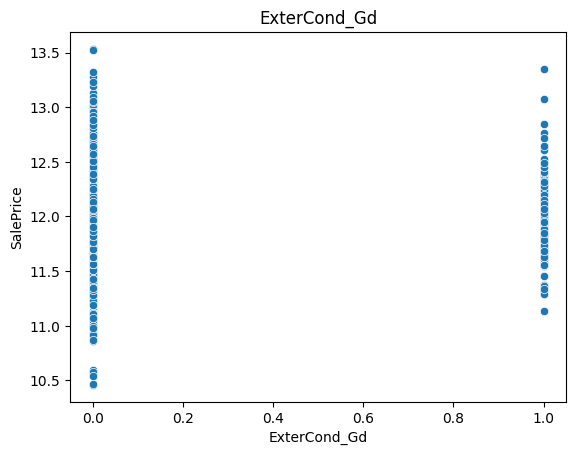

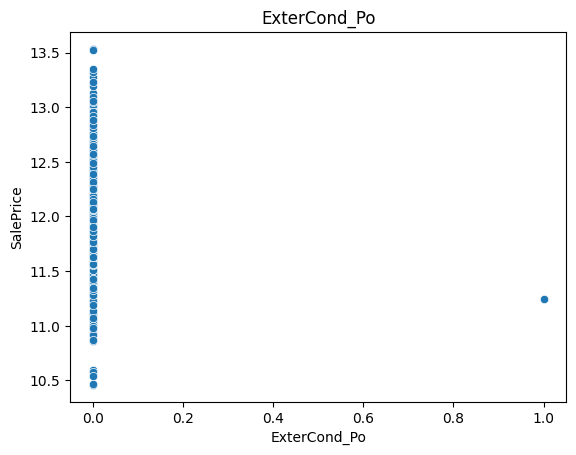

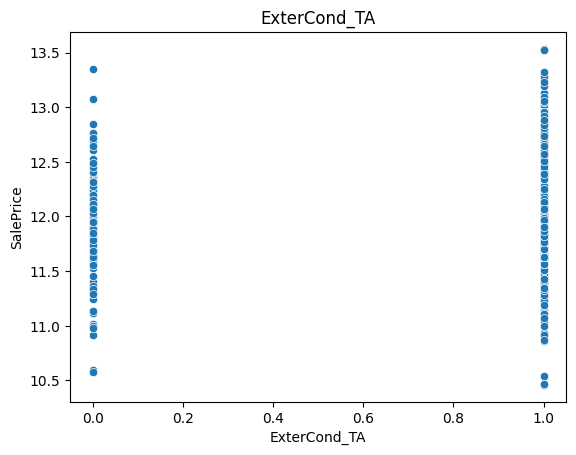

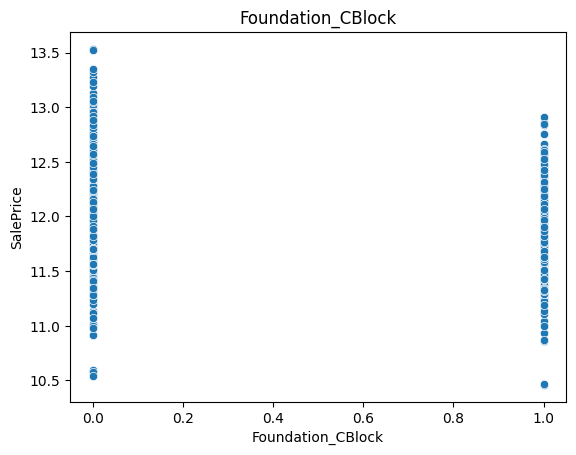

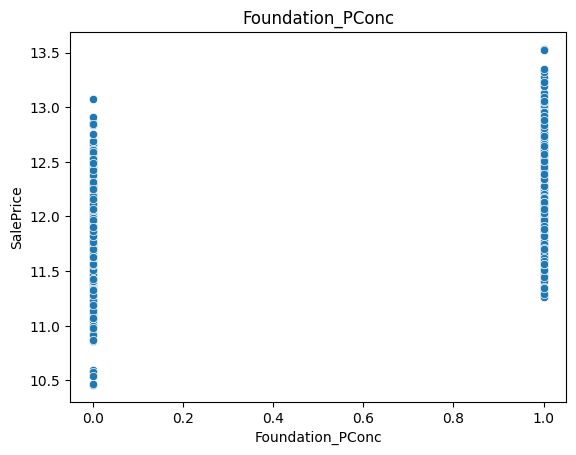

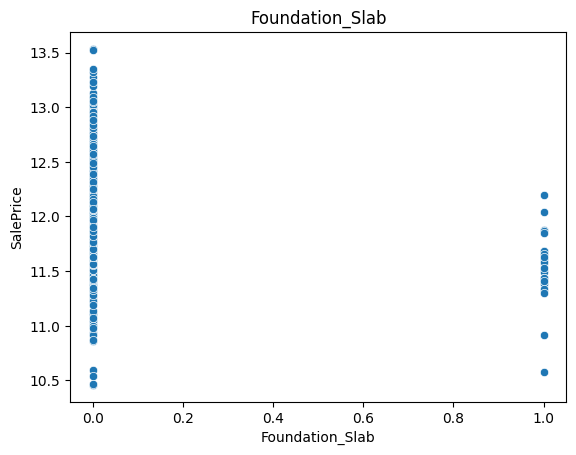

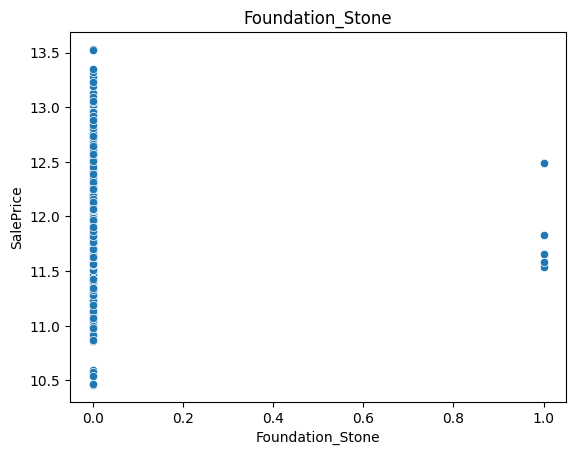

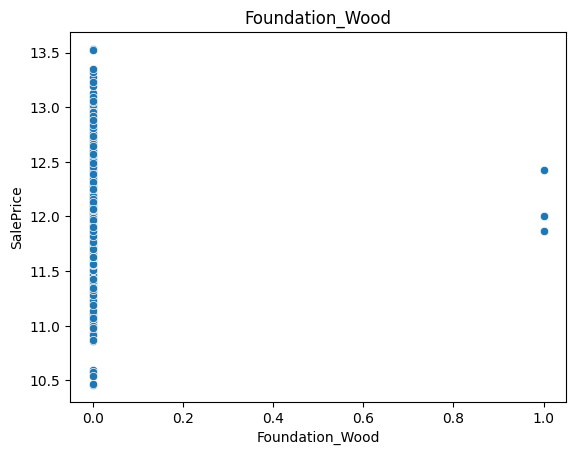

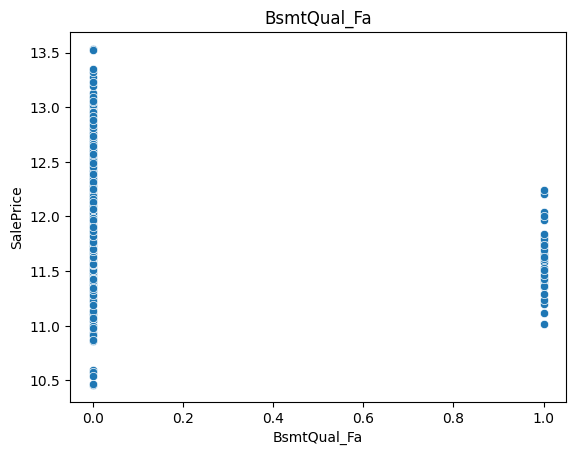

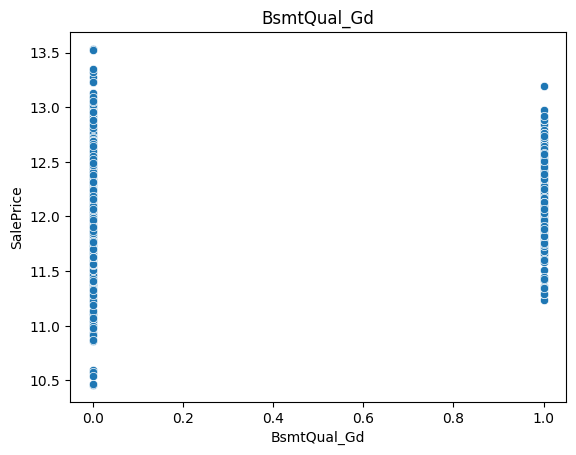

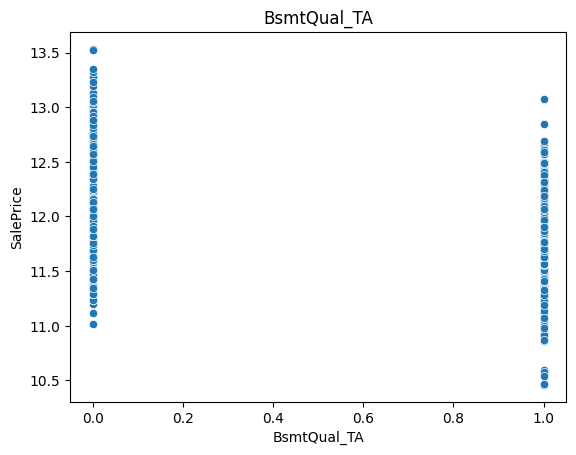

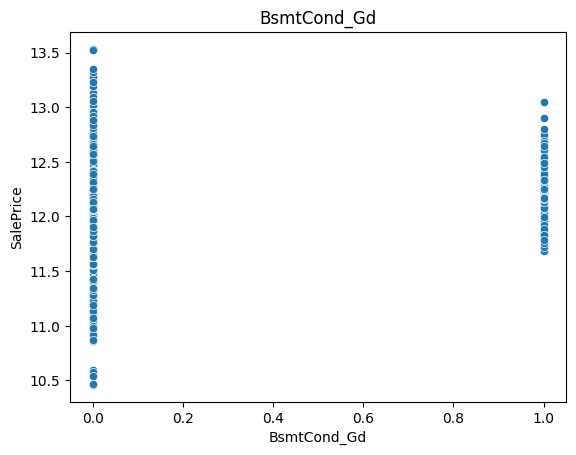

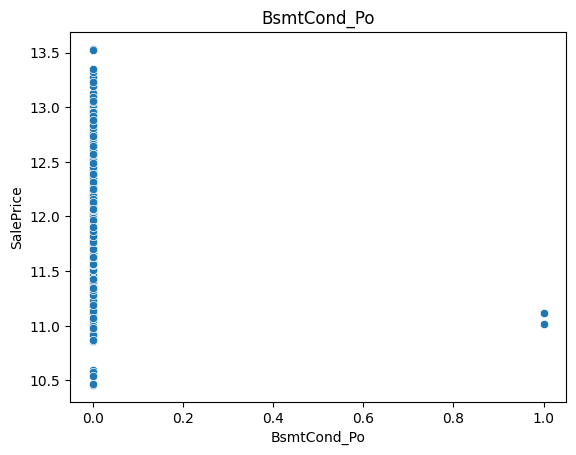

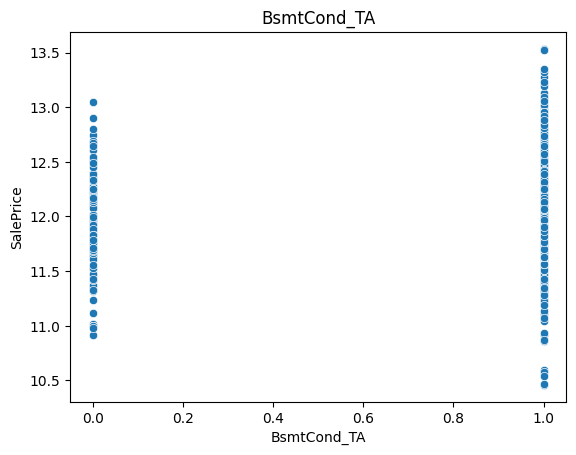

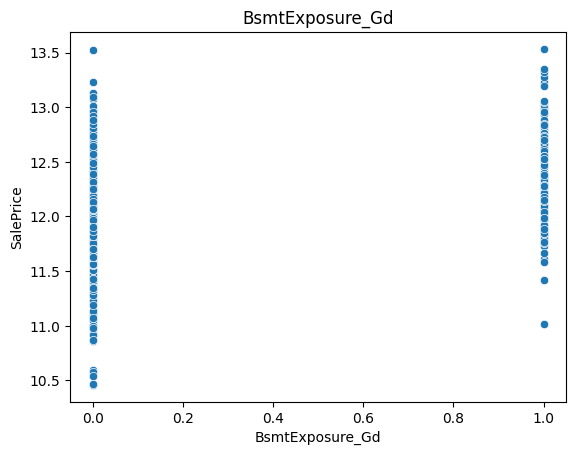

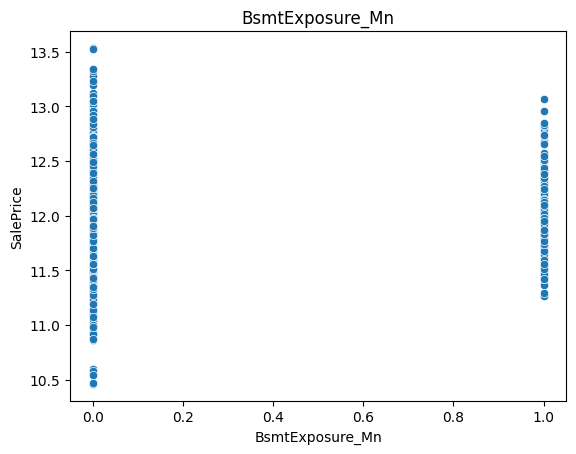

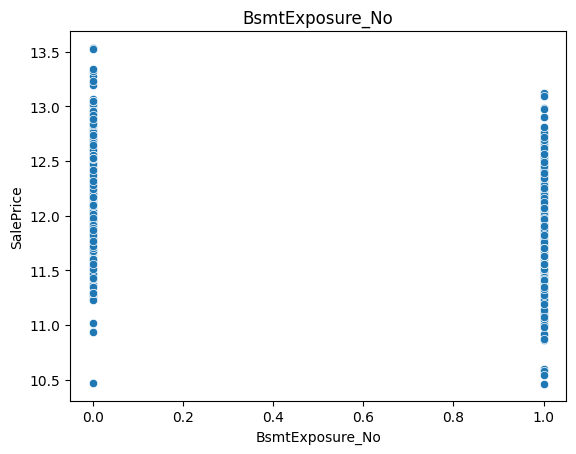

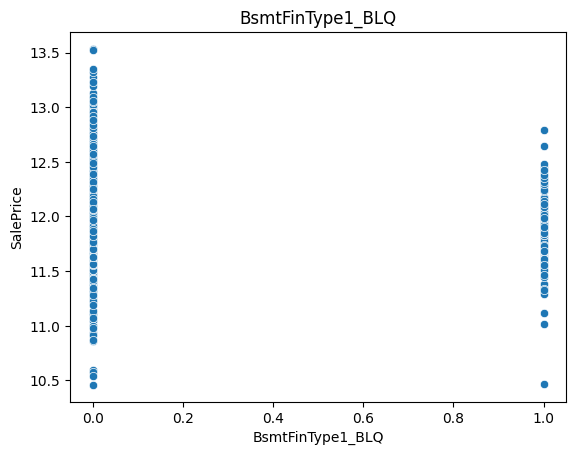

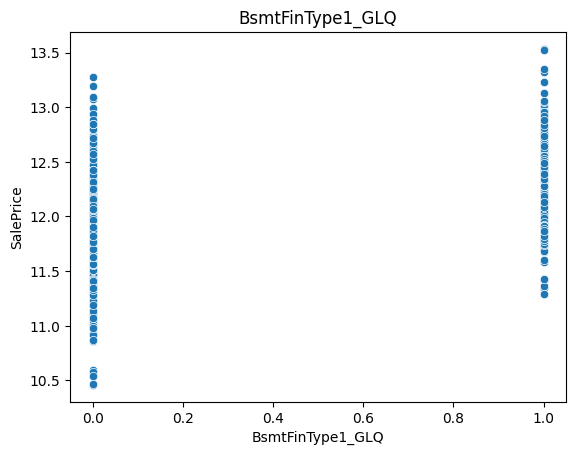

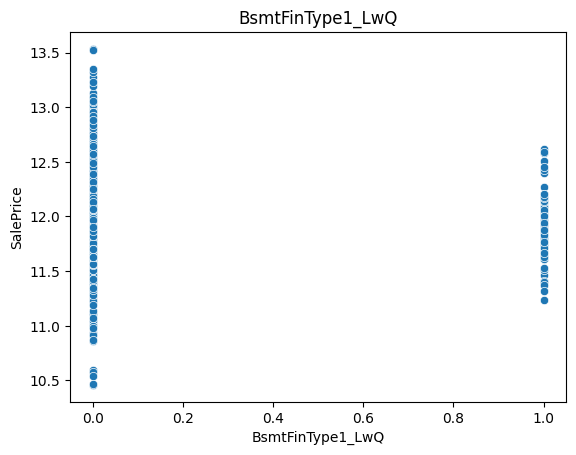

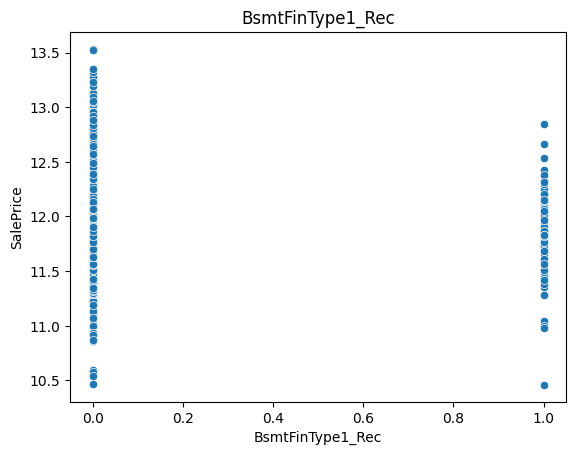

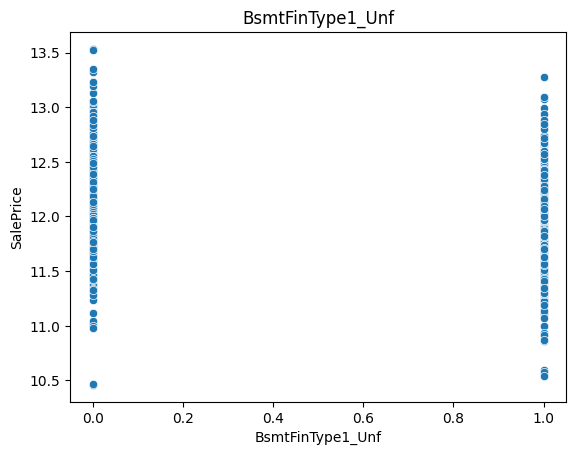

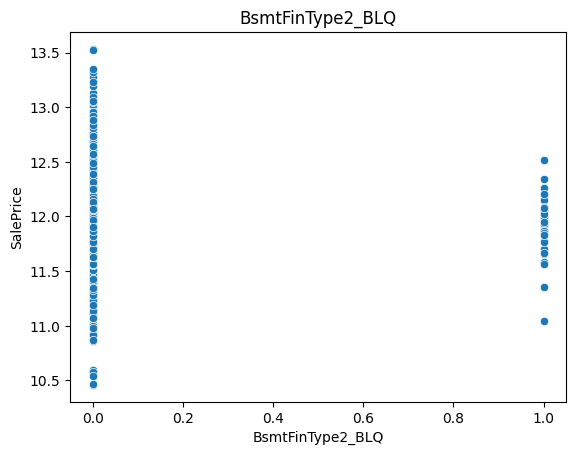

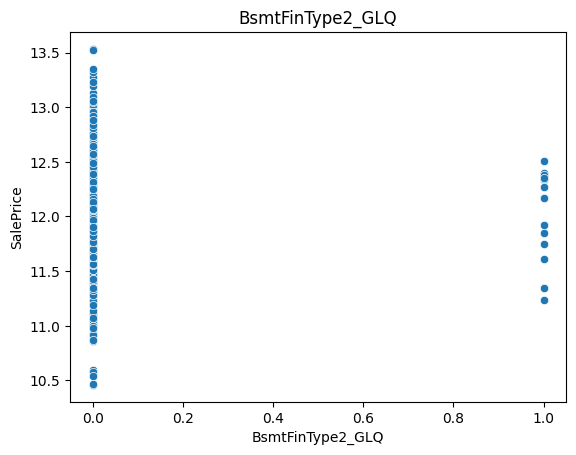

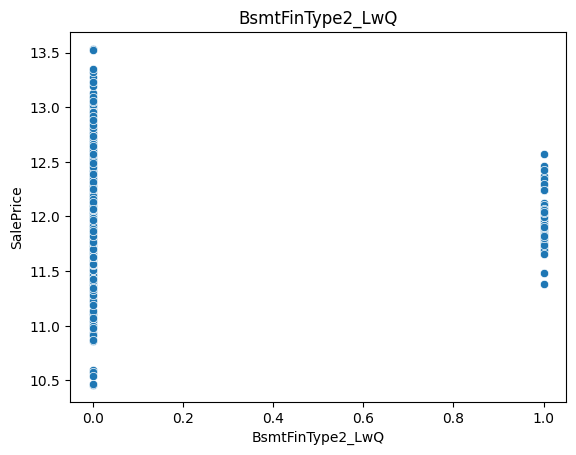

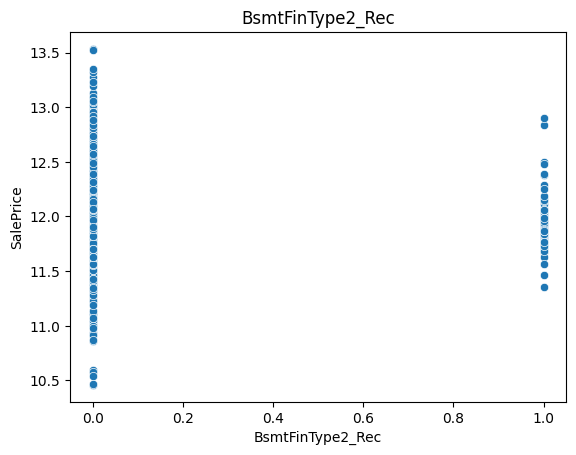

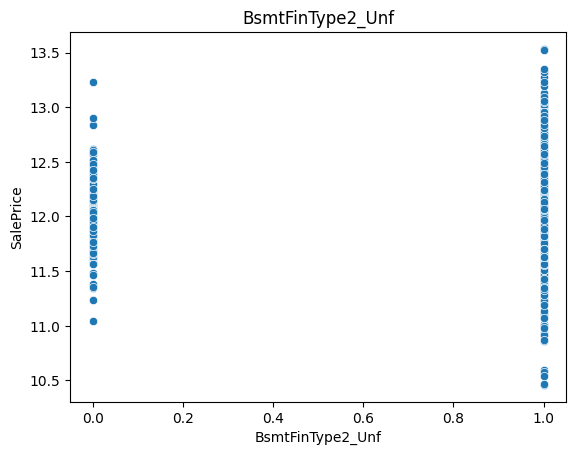

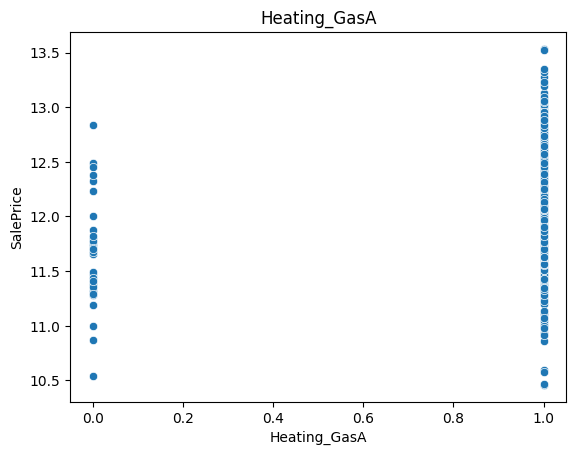

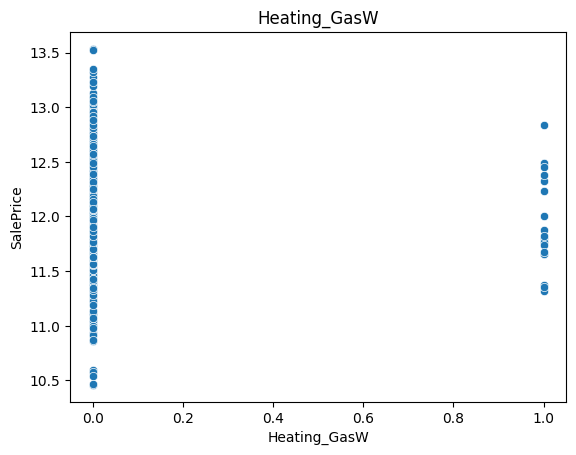

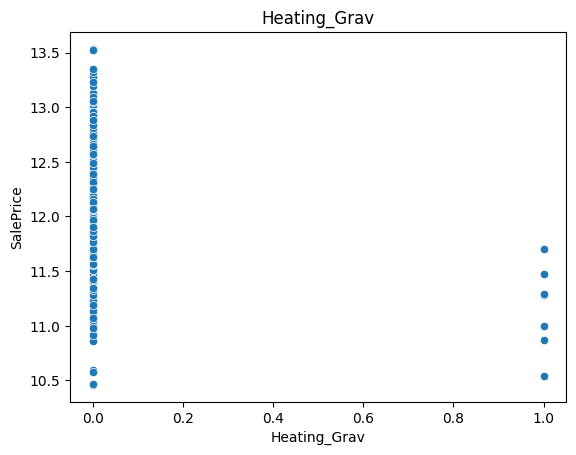

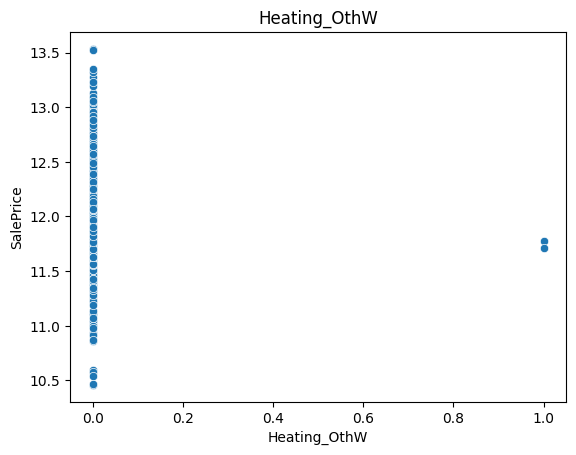

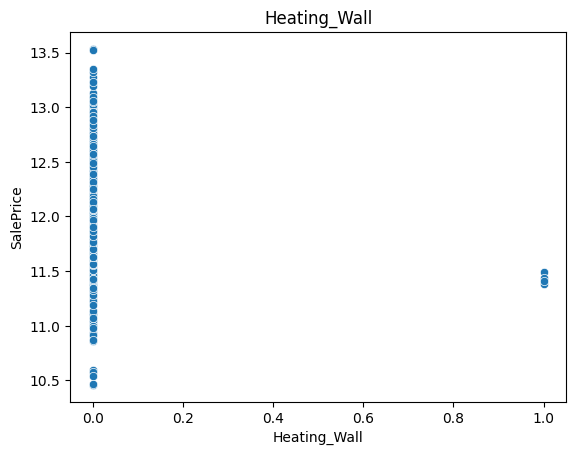

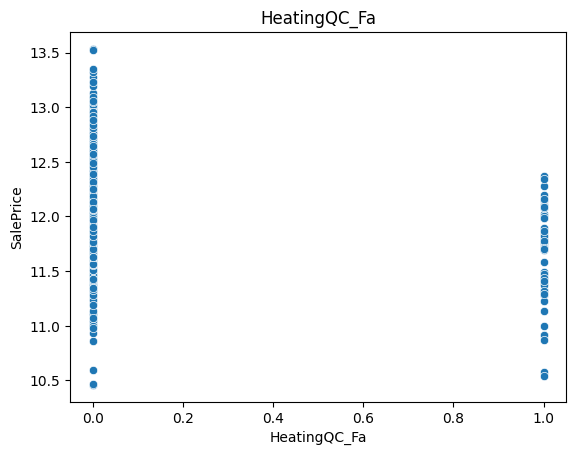

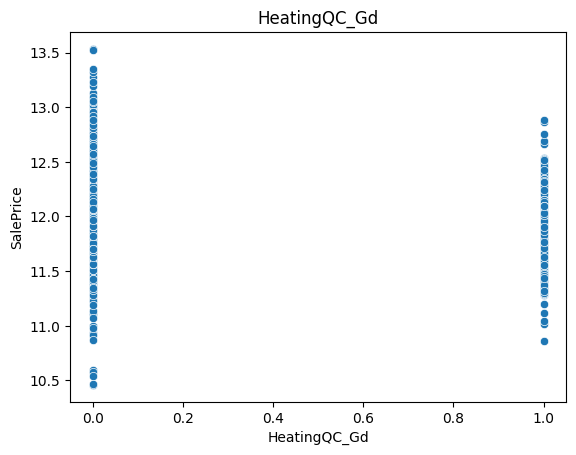

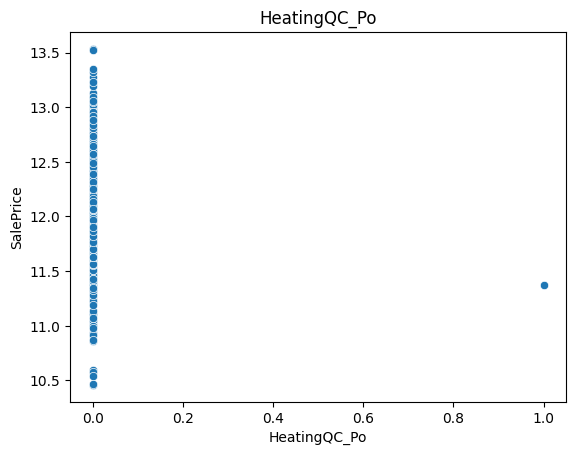

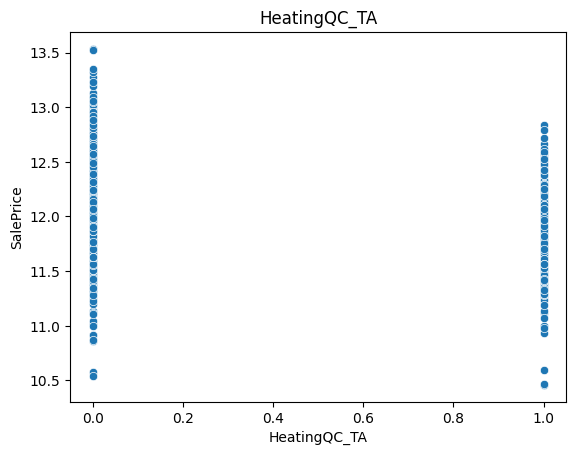

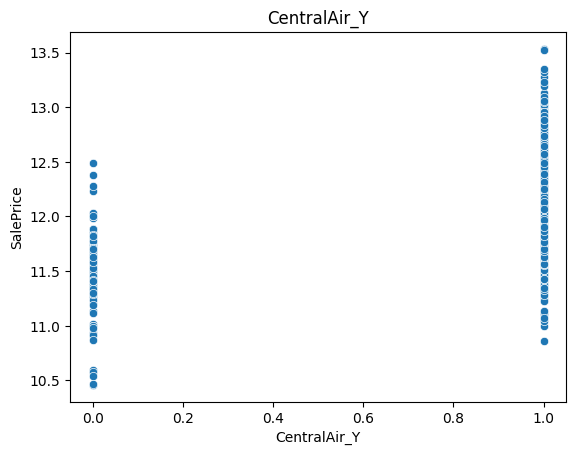

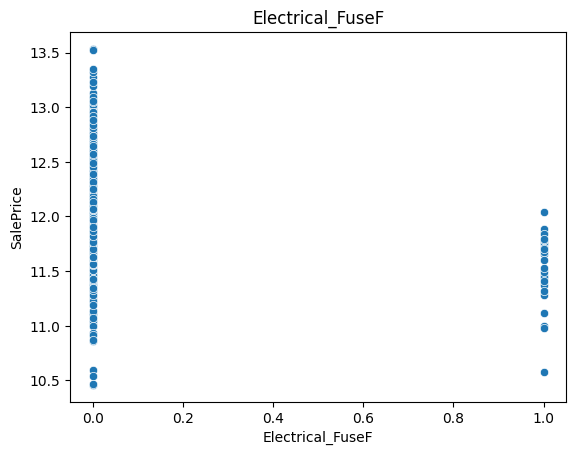

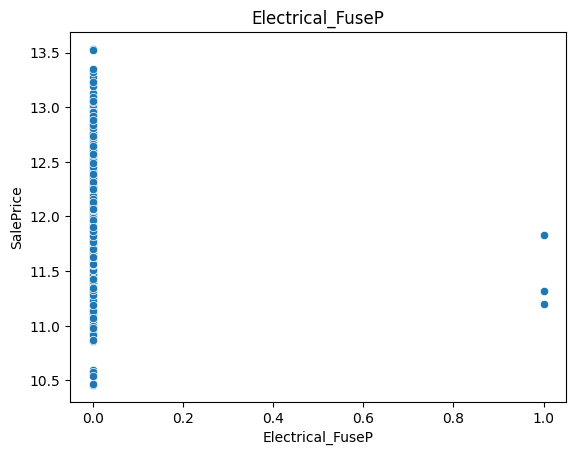

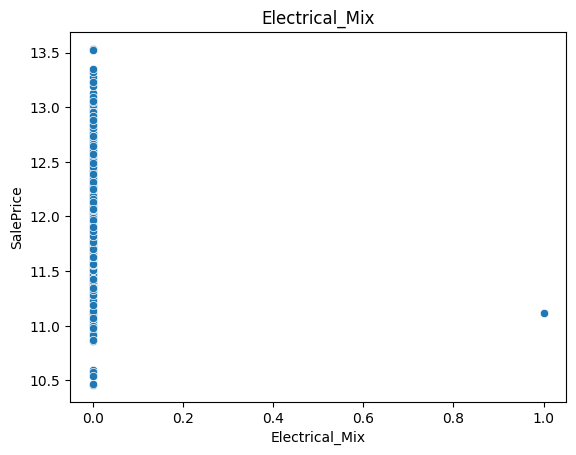

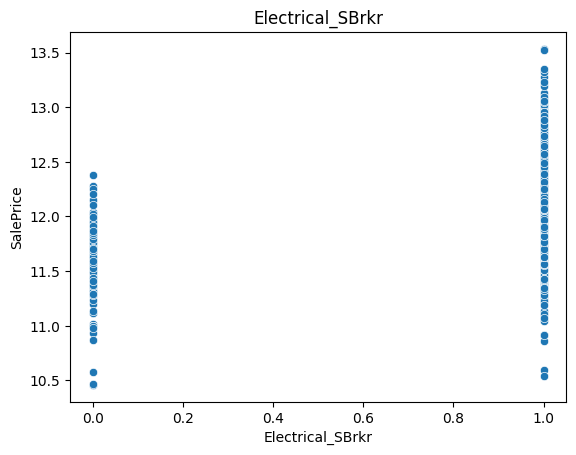

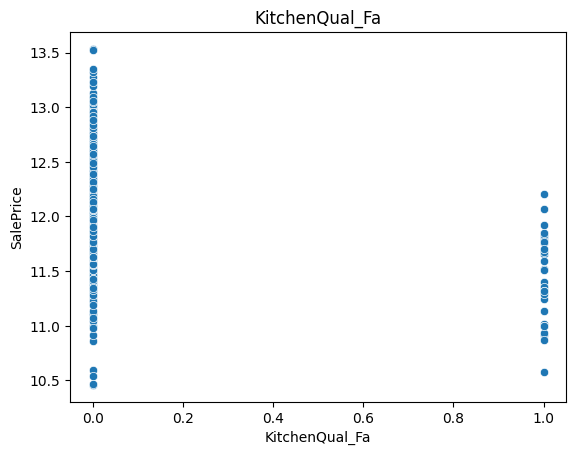

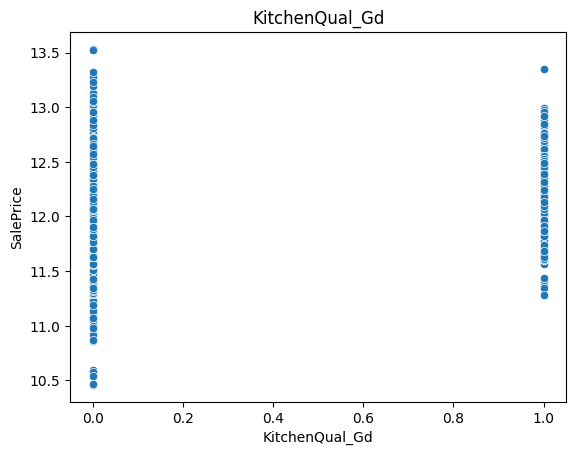

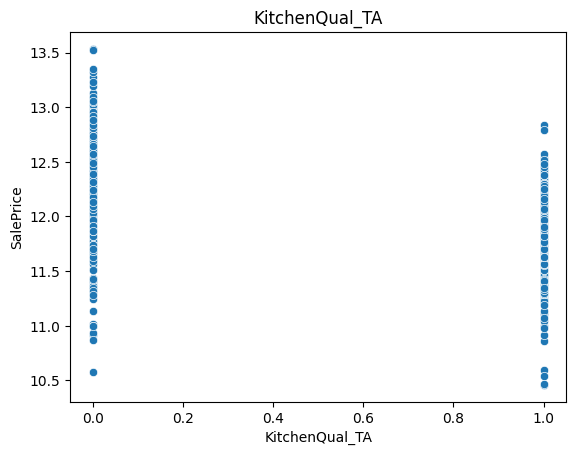

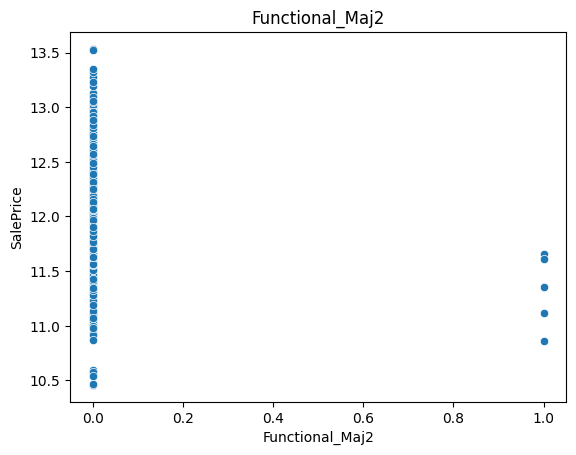

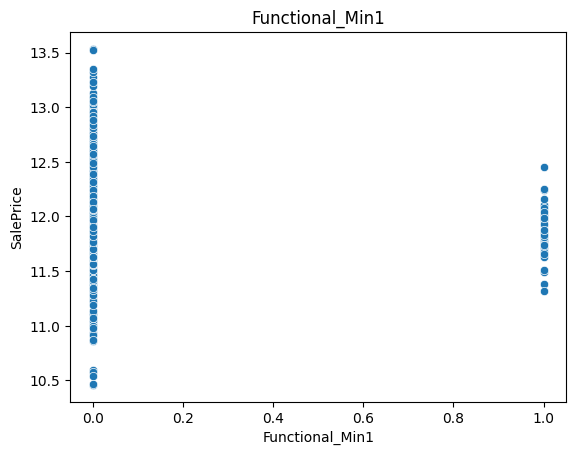

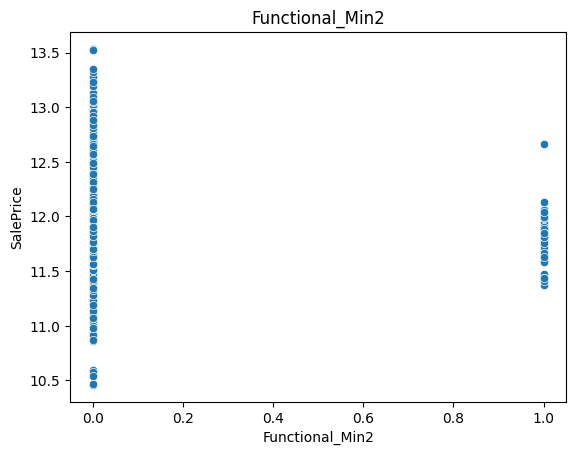

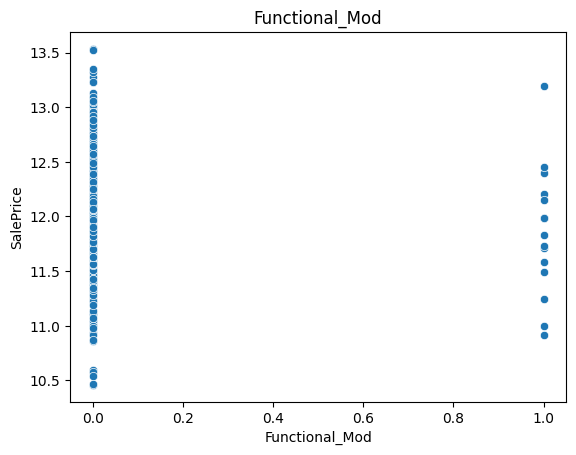

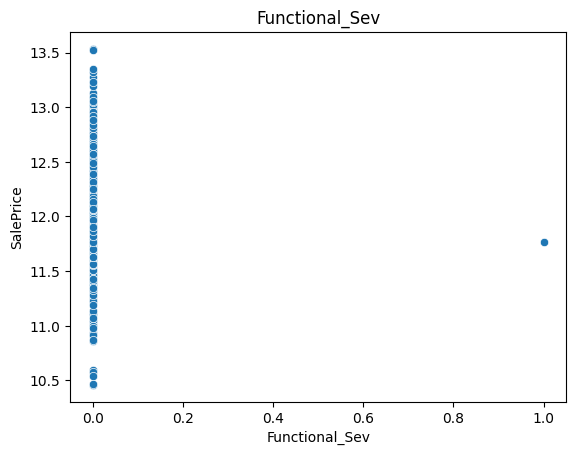

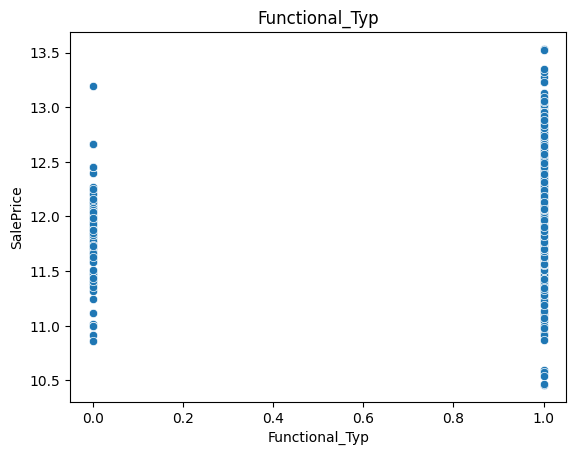

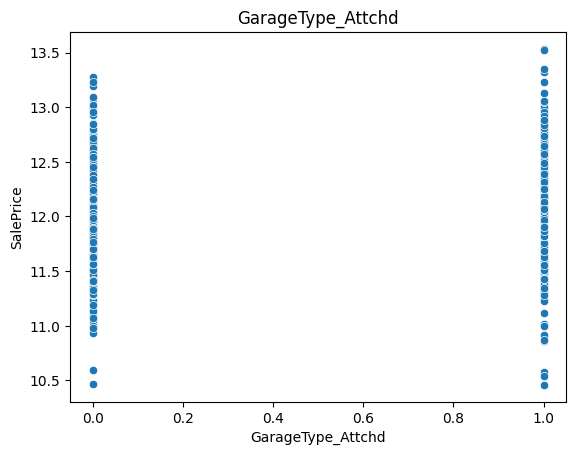

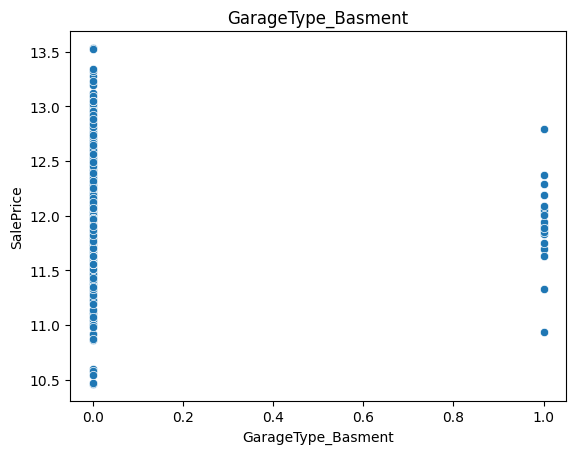

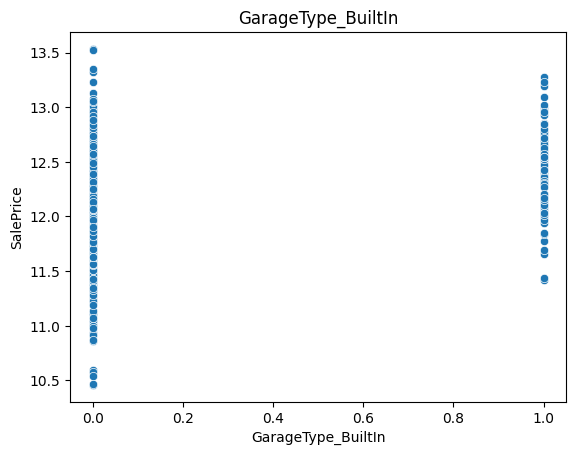

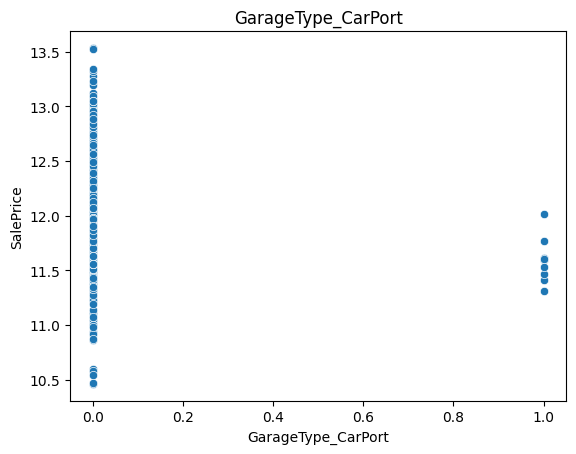

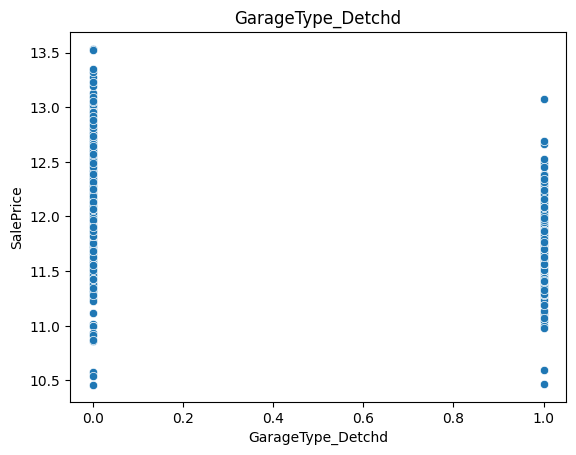

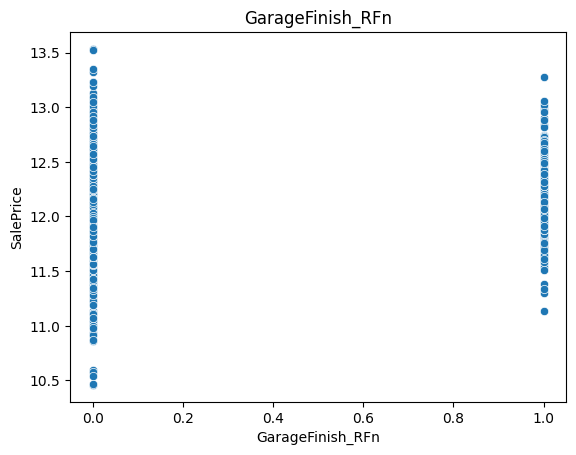

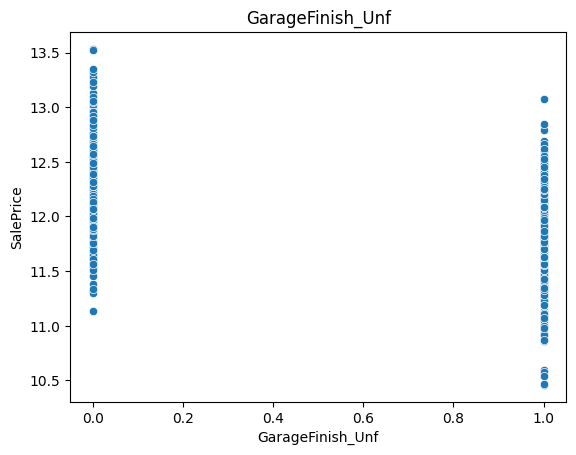

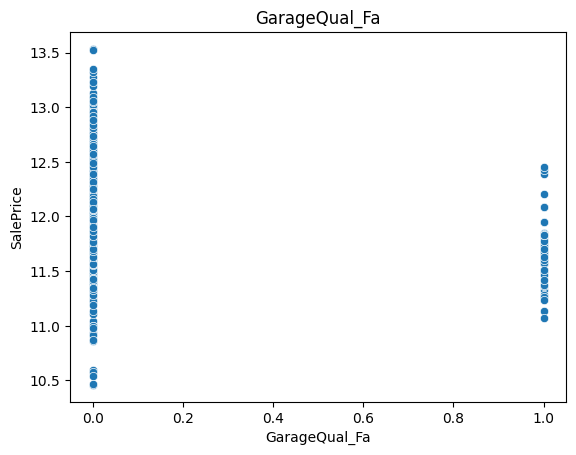

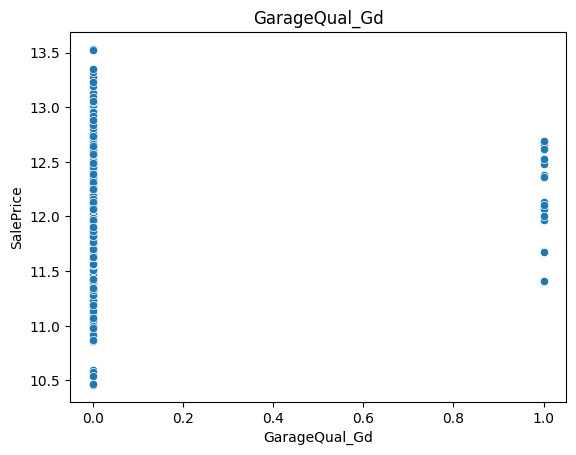

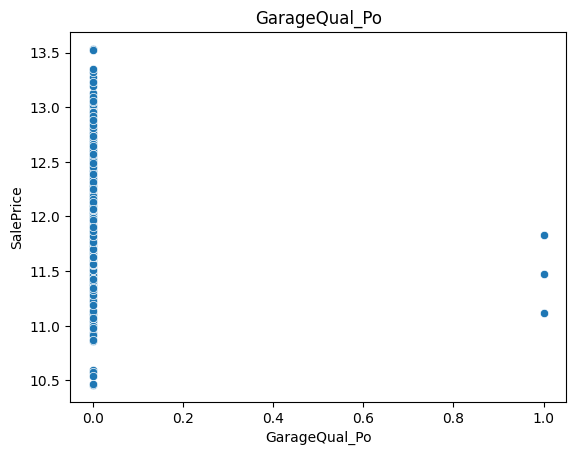

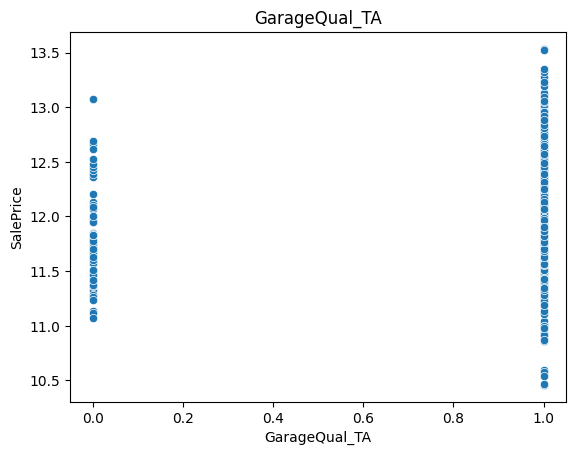

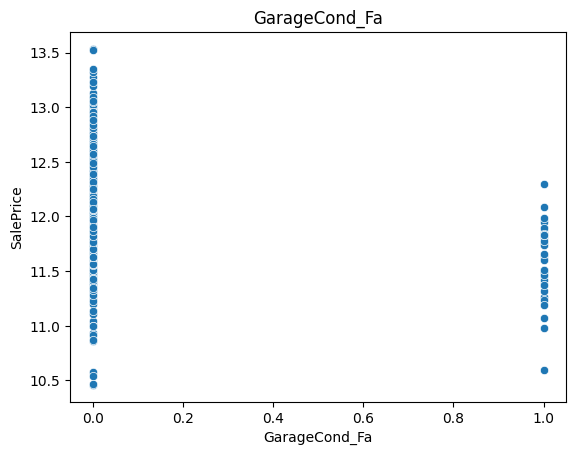

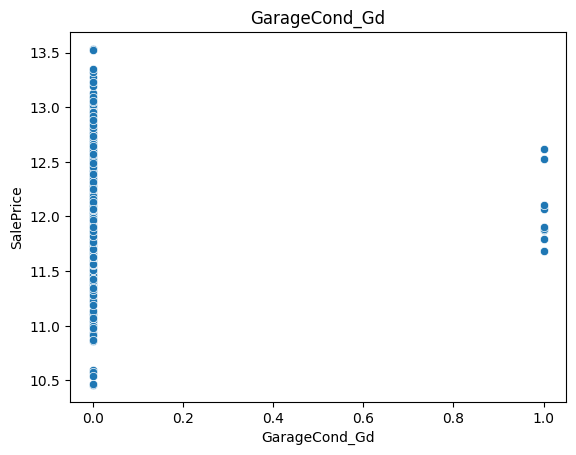

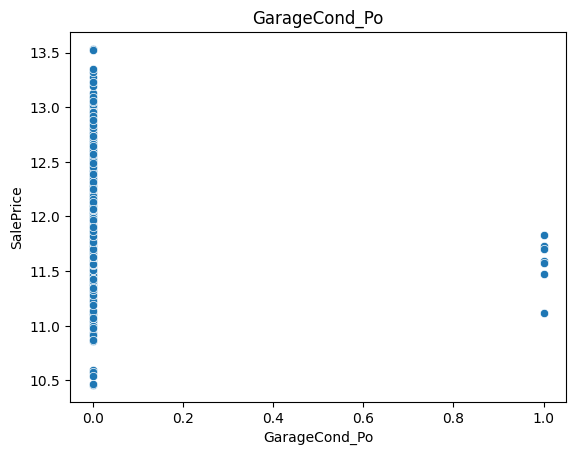

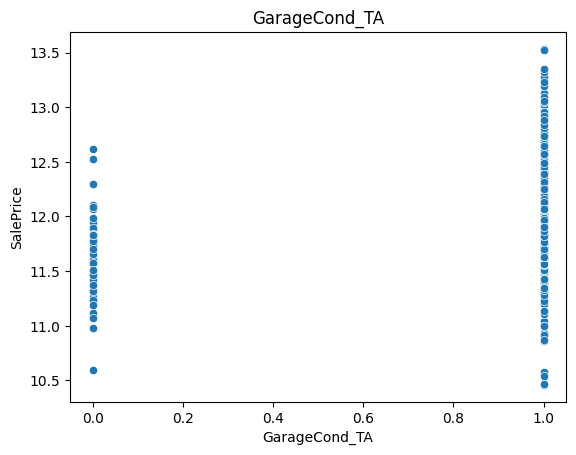

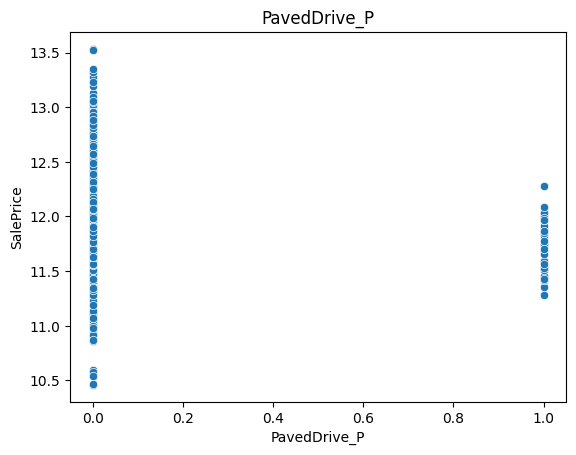

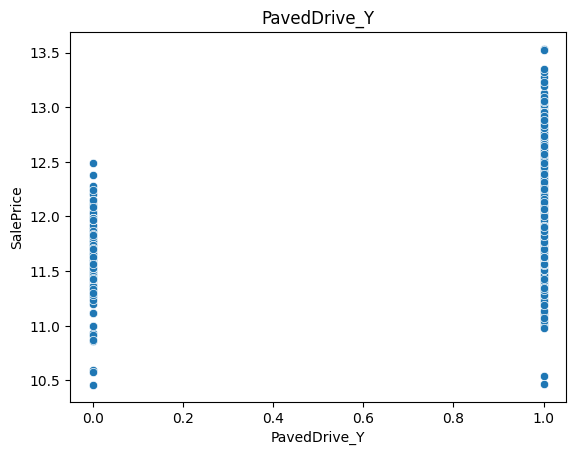

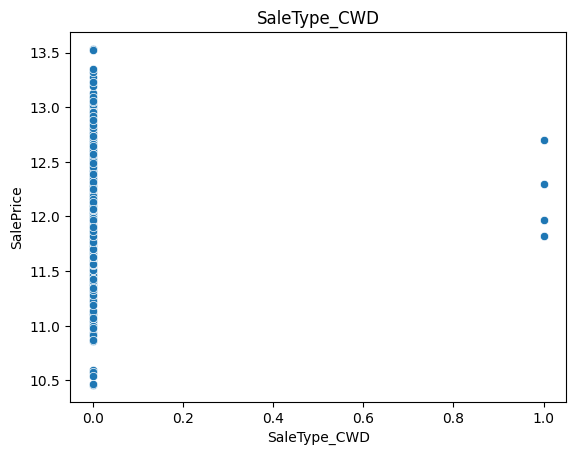

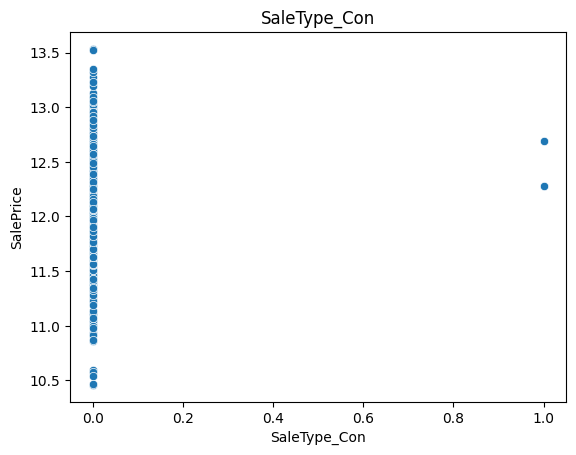

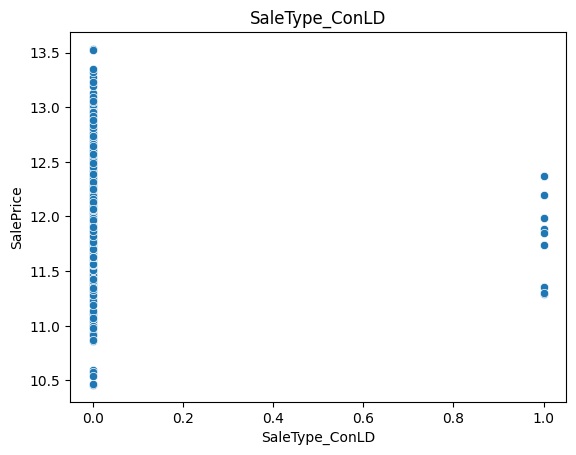

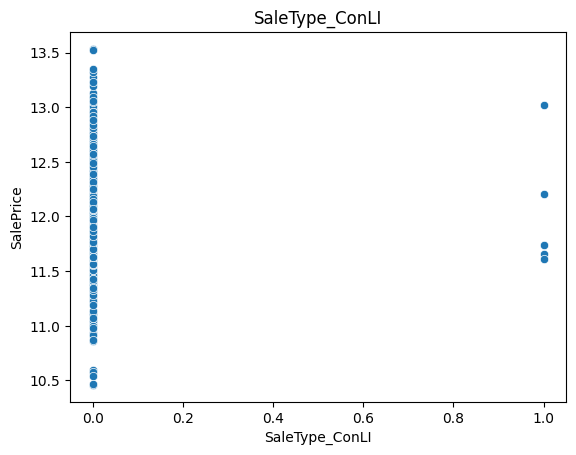

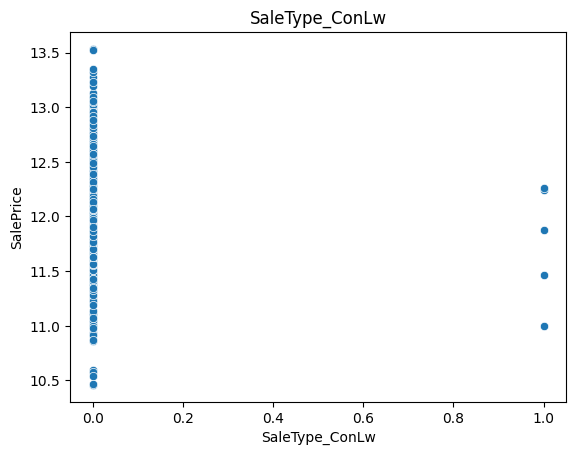

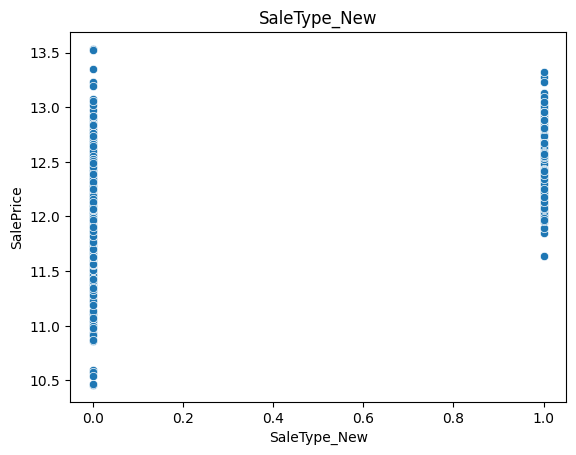

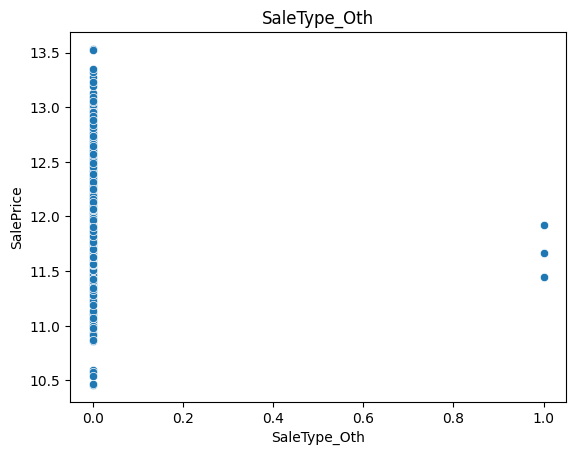

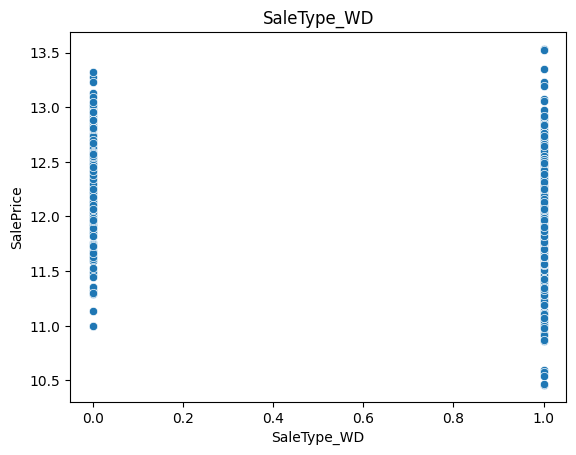

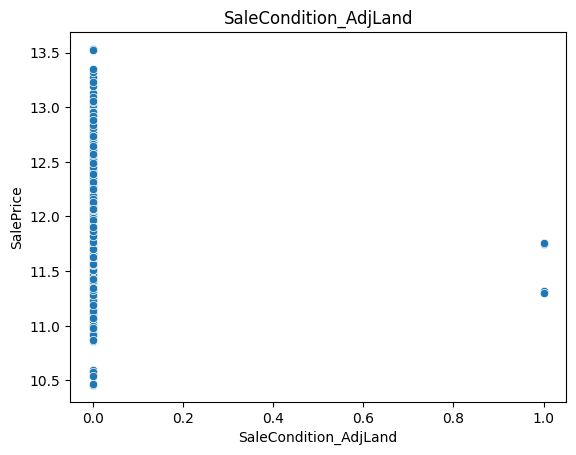

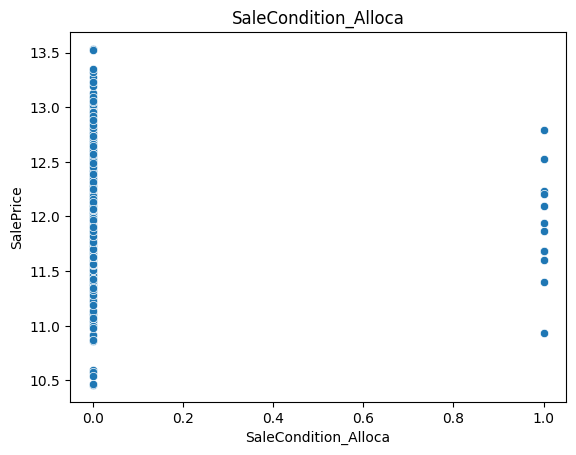

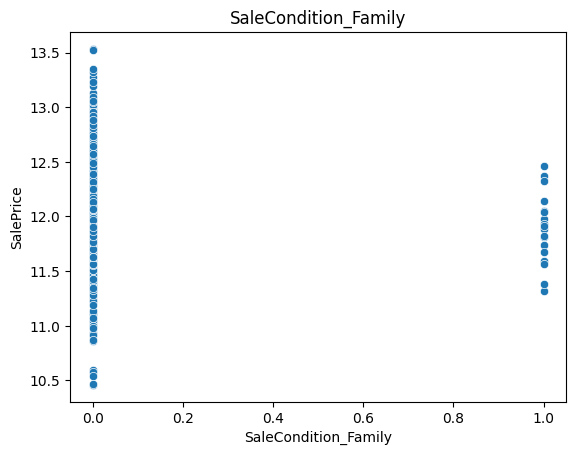

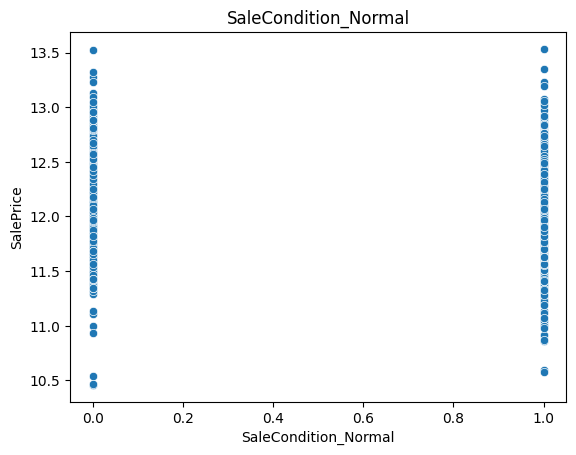

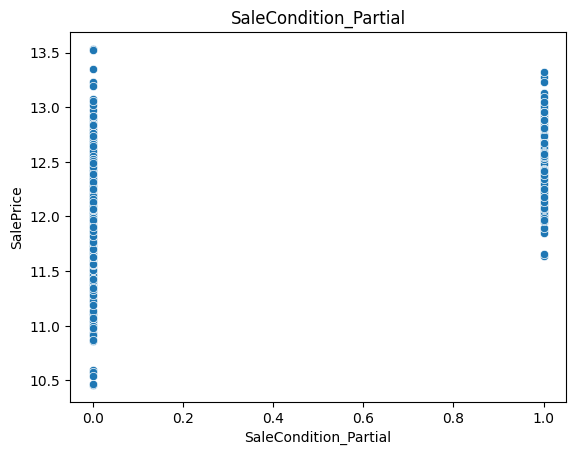

In [ ]:
# for i in df.columns:
#   sns.scatterplot(x=i, y='SalePrice', data=df)
#   plt.title(i)
#   plt.show()


In [ ]:
X = df.drop(['SalePrice', 'Id'], axis=1)
y = df['SalePrice']


In [ ]:
ss=StandardScaler()

In [ ]:
X=ss.fit_transform(X)

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [ ]:
lr.score(X_test,y_test)*100

95.07564944956918

In [ ]:
#EVALUATION
y_pred = lr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.9507564944956918
RMSE: 0.09586124995924246


In [ ]:
# Select a sample row from the original dataframe
sample_row = df.iloc[1]

# Drop 'Id' and 'SalePrice' to match the features the model was trained on
sample_input = sample_row.drop(['Id', 'SalePrice']).values.reshape(1, -1)

# Scale the sample input using the same scaler
scaled_sample_input = ss.transform(sample_input)

# Make a prediction
predicted_price_log = lr.predict(scaled_sample_input)

# Inverse transform the prediction to get the actual price
predicted_price = np.expm1(predicted_price_log)

print("Predicted Sale Price:", predicted_price[0])

Predicted Sale Price: 200194.92016643268


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


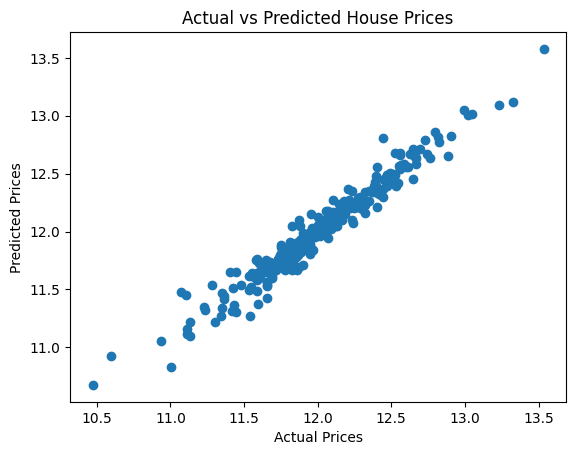

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [ ]:
print(np.expm1(df['SalePrice'][0]))

208499.99999999983
